In [1]:
library(mgcv)

Loading required package: nlme
This is mgcv 1.8-23. For overview type 'help("mgcv-package")'.


In [2]:
ROOT <- '/Users/dongmeichen/Documents/beetle'
DATA <- sprintf('%s/data', ROOT)
data <- read.csv(sprintf('%s/mpb10km_data_clean.csv', DATA))
head(data)

lon       lat      etopo1   beetleAcres host forest mStdAge   density 
1 -123.9778 41.15724 462.4003  0.46000    1    1       24.51245 51675.95
2 -123.6292 39.83341 636.2545  0.70000    1    1       78.60288 47511.05
3 -123.7100 41.00384 758.2146  0.92000    1    1       56.26146 51141.66
4 -123.7726 41.36003 924.6661 15.23333    1    1      189.66301 52250.75
5 -123.6073 41.10505 766.6403  0.70000    1    1       78.18508 50122.04
6 -123.6228 41.19412 729.4384  9.30000    1    1      109.59647 51100.97
  PctLarge  PctOld     ⋯ JanMin    TOctSep   Jan20 PcumOctSep logSprsCPA.p1
1 0.2191781 0.06666667 ⋯ -1.310873 10.921748 0     2914.449   8.112028     
2 0.3593750 0.50000000 ⋯ -2.068149 10.979370 0     2751.259   9.361249     
3 0.4605263 0.71428571 ⋯ -2.187790 11.975916 0     2702.836   8.456540     
4 0.3257576 0.20833333 ⋯ -3.029533  8.998663 0     2946.935   9.933758     
5 0.3162281 0.20000000 ⋯ -3.342976  8.919163 0     2822.343   8.805613     
6 0.3793103 0.11111111 ⋯ -2.963782 10.673803 0     2762.928   8.071219     
  SprsFires PctSprs   SprsAcre    SprsDays OutDays
1 7         0.8750000    8.257143  3.0      6.0   
2 1         1.0000000 3597.000000 34.0     72.0   
3 8         0.6666667    0.112500  0.0      0.5   
4 2         0.3333333    0.300000  1.0      0.5   
5 8         0.8000000  606.425000  0.5      1.0   
6 9         0.6923077   11.266667  1.0      4.0

In [3]:
for (field in names(data)) {
  if (field != 'beetleAcres') {
    cat(sprintf('te(%s) + ', field))   
  }
}

te(lon) + te(lat) + te(etopo1) + te(host) + te(forest) + te(mStdAge) + te(density) + te(PctLarge) + te(PctOld) + te(vcc) + te(mfri) + te(prs) + te(pms) + te(pls) + te(GAP1) + te(GAP2) + te(GAP3) + te(vpd) + te(cwd) + te(maxAugT) + te(summerP0) + te(Tmean) + te(mi) + te(Tvar) + te(wd) + te(AugTmean) + te(OctTmin) + te(AugMaxT) + te(AugTmax) + te(Acs) + te(MarMin) + te(ddAugJun) + te(ddAugJul) + te(JanTmin) + te(PPT) + te(summerP2) + te(TMarAug) + te(Mar20) + te(fallTmean) + te(MarTmin) + te(maxT) + te(Tmin) + te(winterMin) + te(summerTmean) + te(Pmean) + te(summerP1) + te(minT) + te(JanMin) + te(TOctSep) + te(Jan20) + te(PcumOctSep) + te(logSprsCPA.p1) + te(SprsFires) + te(PctSprs) + te(SprsAcre) + te(SprsDays) + te(OutDays) + 

For the model below-- Began with all variables included with te() smoothing for all except the binary variables 
(forest, host, GAP*)
For each iteration:
* Find the variable with the largest p value
* If the p value > 0.05 then:
    * If the value is smoothed, convert to simple linear term (no te())
    * If the value is a simple linear term, omit from the model
* Continue as long as the GCV value continues to decrease
* IF GCV increases, attempt simplification or removal of the variable with the next-largest p value

In [4]:
# GAM iteration
ptm <- proc.time()
mod <- gam(
    log(beetleAcres) ~ te(lon) + te(lat) + te(etopo1) + host + forest + te(mStdAge) + 
    te(density) + te(PctLarge) + te(PctOld) + te(vcc) + te(mfri) + te(prs) + te(pms) + 
    te(pls) + GAP1 + GAP2 + GAP3 + te(vpd) + te(cwd) + te(maxAugT) + te(summerP0) + 
    te(Tmean) + te(mi) + te(Tvar) + te(wd) + te(AugTmean) + te(OctTmin) + te(AugMaxT) + 
    te(AugTmax) + te(Acs) + te(MarMin) + te(ddAugJun) + te(ddAugJul) + te(JanTmin) + 
    te(PPT) + te(summerP2) + te(TMarAug) + te(Mar20) + te(fallTmean) + te(MarTmin) + 
    te(maxT) + te(Tmin) + te(winterMin) + te(summerTmean) + te(Pmean) + te(summerP1) + 
    te(minT) + te(JanMin) + te(TOctSep) + te(Jan20) + te(PcumOctSep) + te(logSprsCPA.p1) + 
    te(SprsFires) + te(PctSprs) + te(SprsAcre) + te(SprsDays) + te(OutDays),
    data=data) # GCV = 2.3707
proc.time() - ptm

   user  system elapsed 
 23.635   0.513  26.117 

In [5]:
summary(mod)


Family: gaussian 
Link function: identity 

Formula:
log(beetleAcres) ~ te(lon) + te(lat) + te(etopo1) + host + forest + 
    te(mStdAge) + te(density) + te(PctLarge) + te(PctOld) + te(vcc) + 
    te(mfri) + te(prs) + te(pms) + te(pls) + GAP1 + GAP2 + GAP3 + 
    te(vpd) + te(cwd) + te(maxAugT) + te(summerP0) + te(Tmean) + 
    te(mi) + te(Tvar) + te(wd) + te(AugTmean) + te(OctTmin) + 
    te(AugMaxT) + te(AugTmax) + te(Acs) + te(MarMin) + te(ddAugJun) + 
    te(ddAugJul) + te(JanTmin) + te(PPT) + te(summerP2) + te(TMarAug) + 
    te(Mar20) + te(fallTmean) + te(MarTmin) + te(maxT) + te(Tmin) + 
    te(winterMin) + te(summerTmean) + te(Pmean) + te(summerP1) + 
    te(minT) + te(JanMin) + te(TOctSep) + te(Jan20) + te(PcumOctSep) + 
    te(logSprsCPA.p1) + te(SprsFires) + te(PctSprs) + te(SprsAcre) + 
    te(SprsDays) + te(OutDays)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.74815    0.28456  13.172   <2e-16 ***
host         0.59280    0.

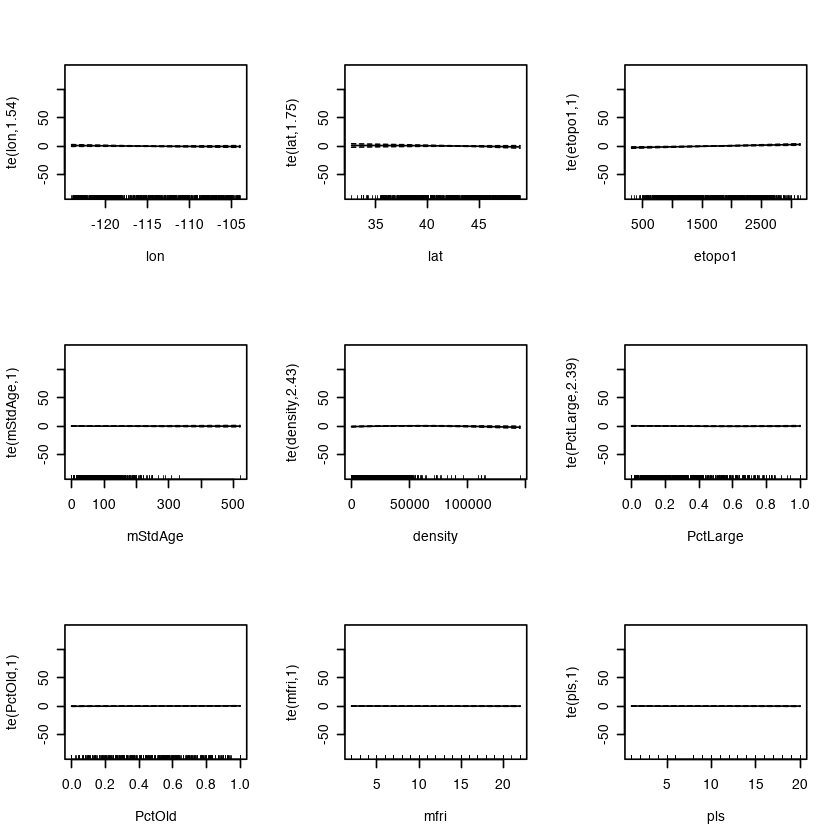

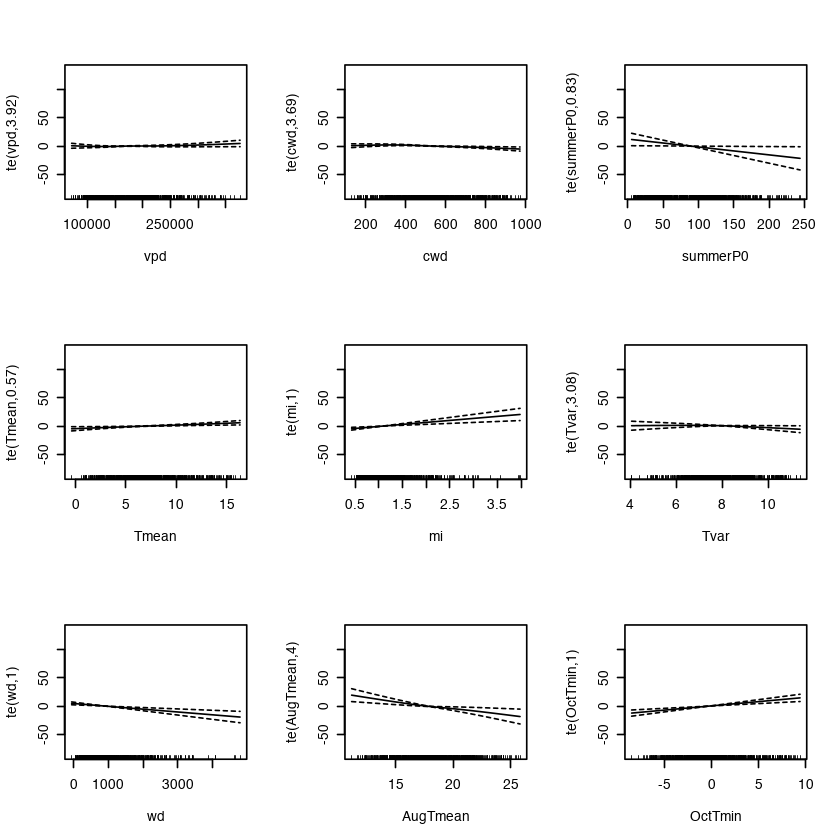

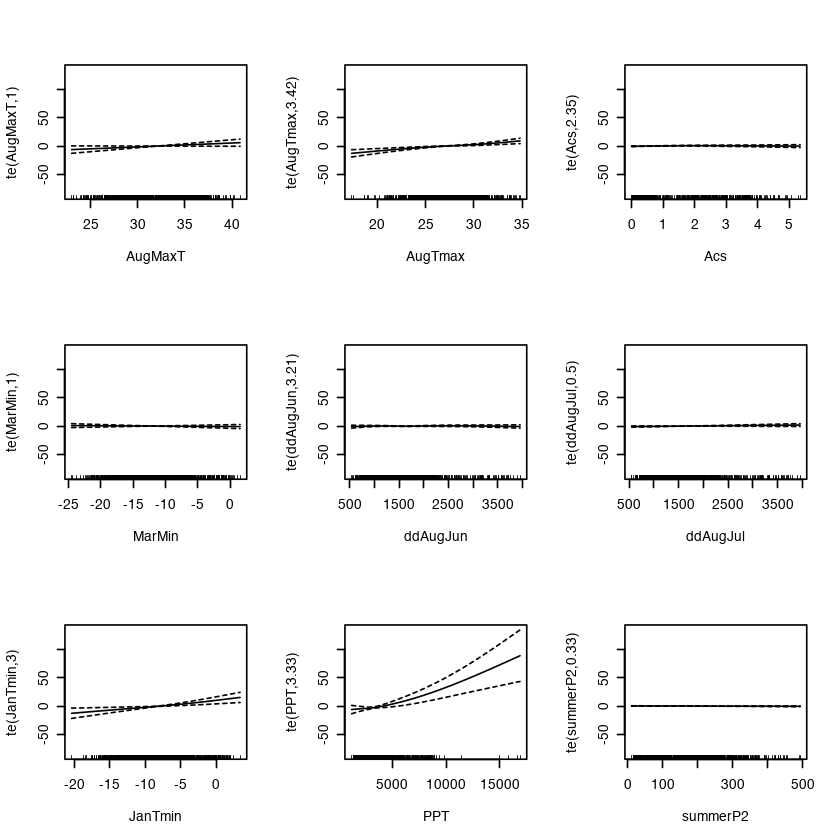

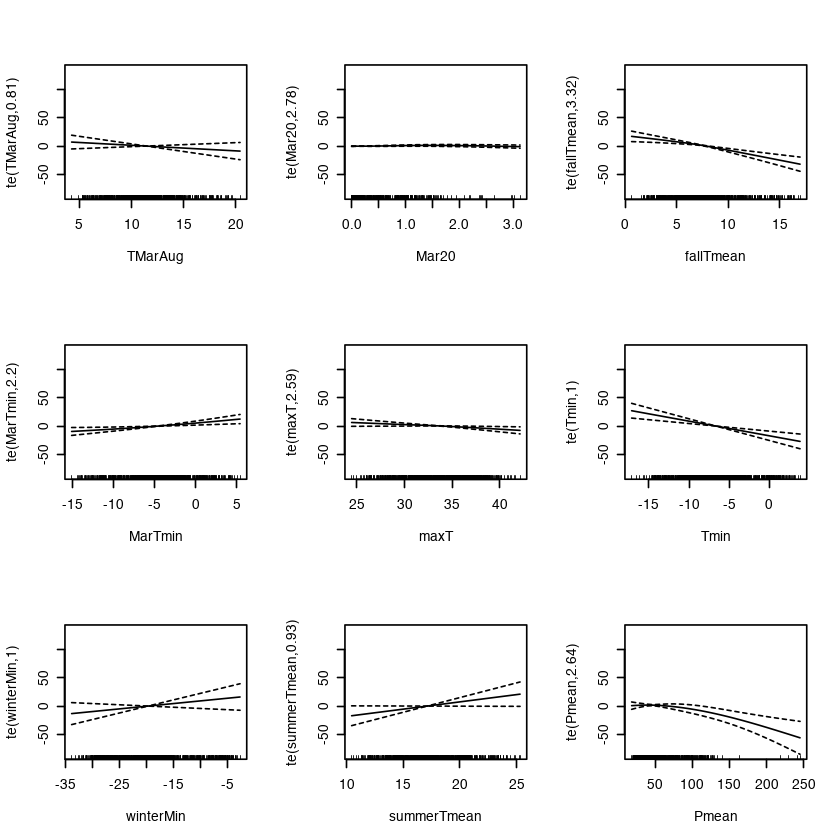

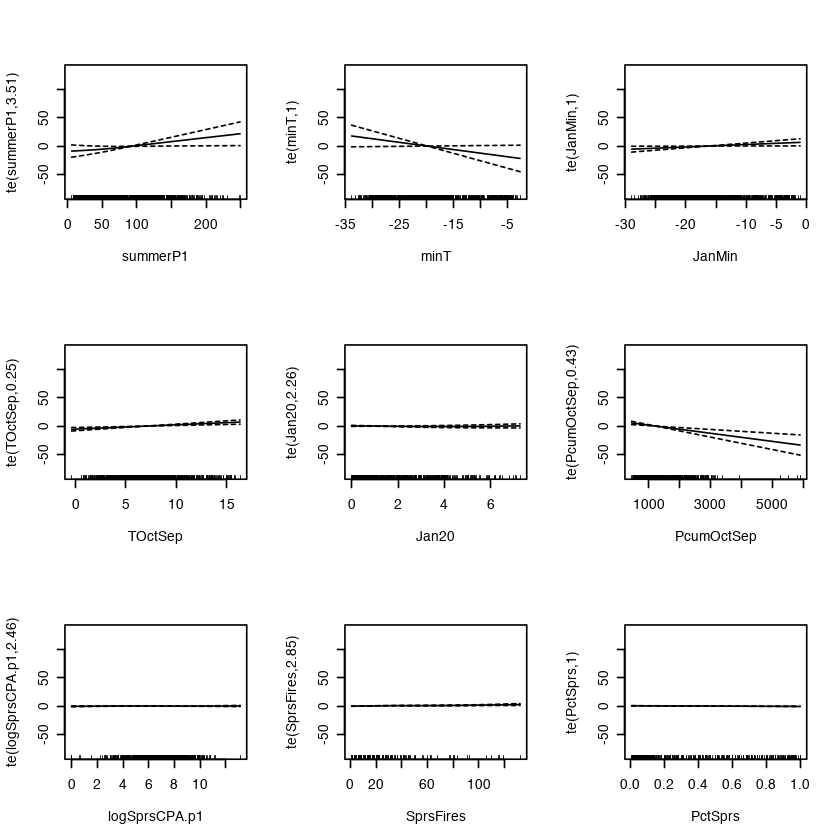

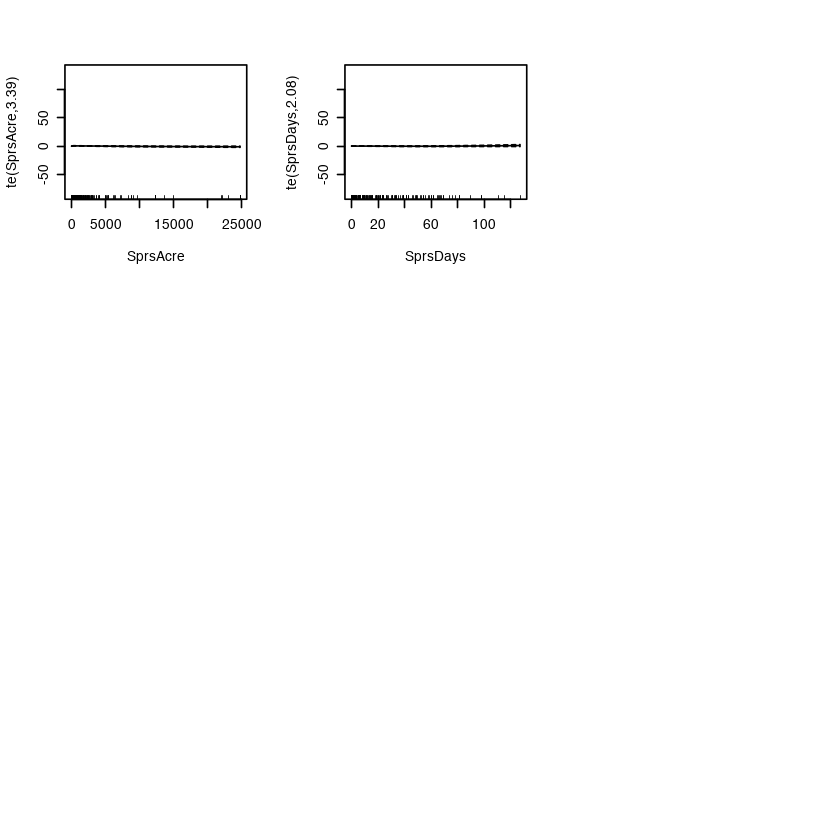

In [16]:
par(mfrow=c(3, 3))
plot(mod)

In [51]:
smoothed <- c(
  'lon', 'lat', 'etopo1', 'mStdAge', 'density', 'PctLarge', 'vcc', 'mfri',
  'prs', 'pms', 'pls', 'vpd', 'cwd', 'maxAugT', 'summerP0', 'Tmean', 'mi', 
  'Tvar', 'wd', 'AugTmean', 'OctTmin', 'AugMaxT', 'Acs', 'MarMin', 'ddAugJun', 
  'ddAugJul', 'JanTmin', 'PPT', 'summerP2', 'TMarAug', 'Mar20', 'fallTmean', 
  'MarTmin', 'maxT', 'Tmin', 'winterMin', 'summerTmean', 'Pmean', 'summerP1', 'minT', 
  'JanMin', 'TOctSep', 'Jan20', 'PcumOctSep', 'logSprsCPA.p1', 'SprsFires', 
  'PctSprs', 'SprsAcre', 'SprsDays', 'OutDays')

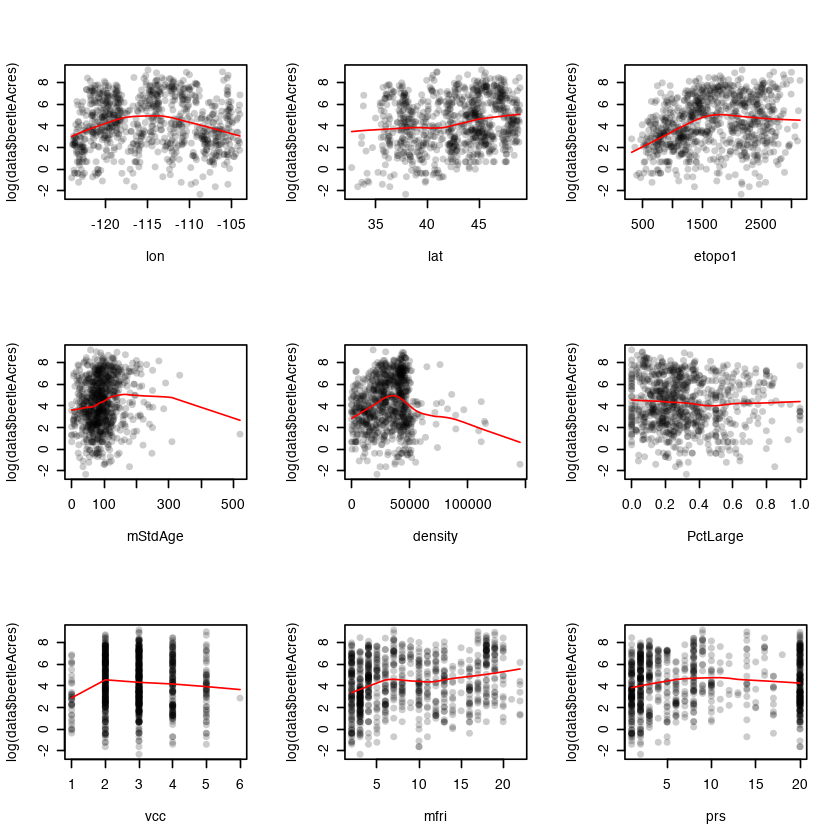

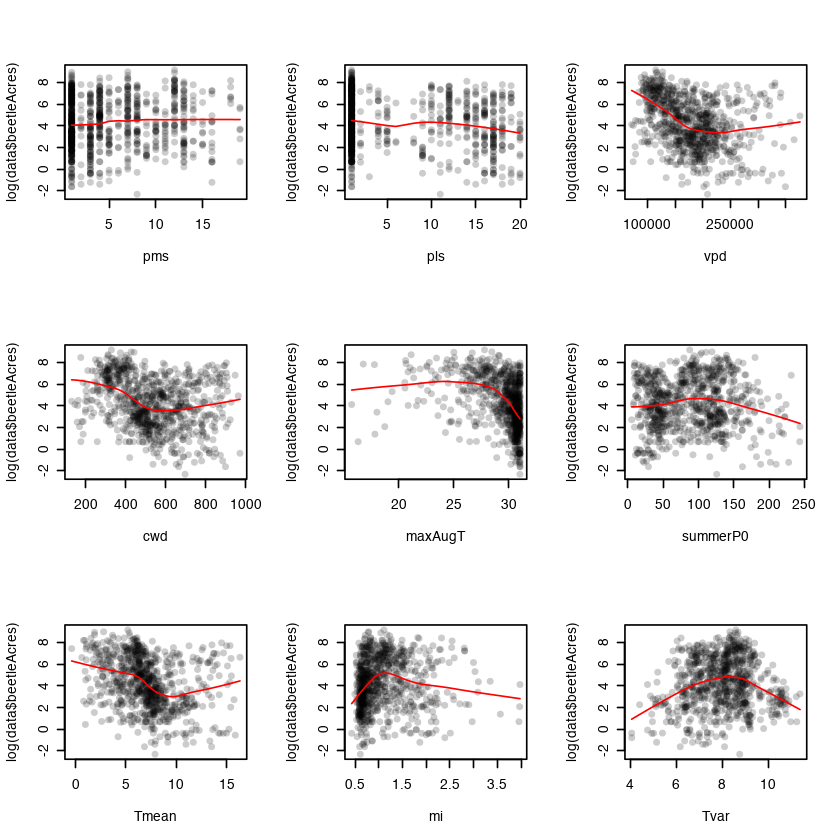

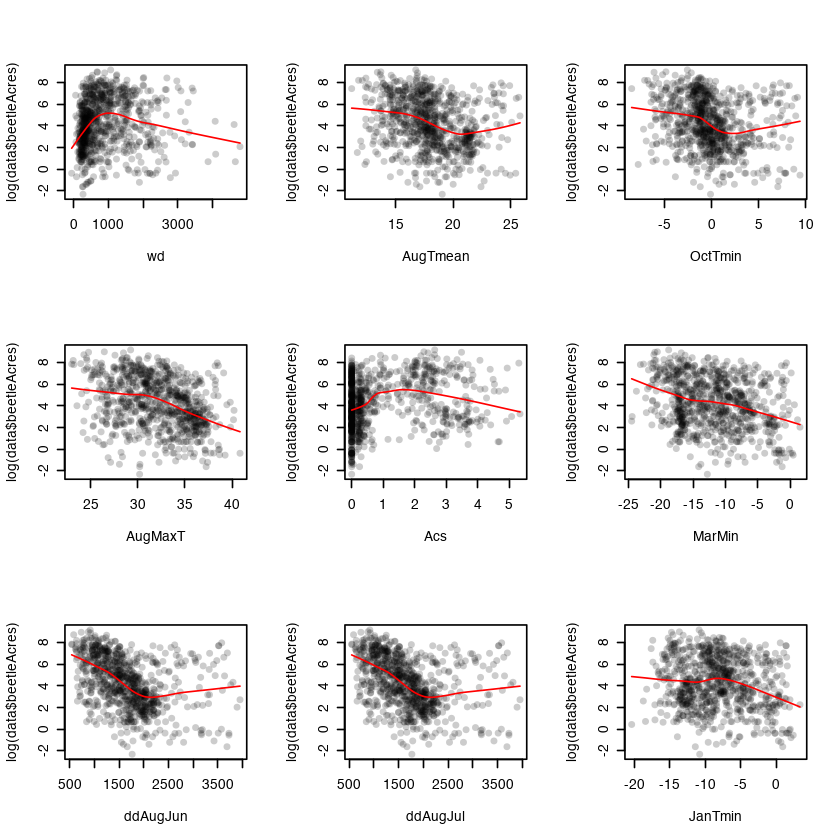

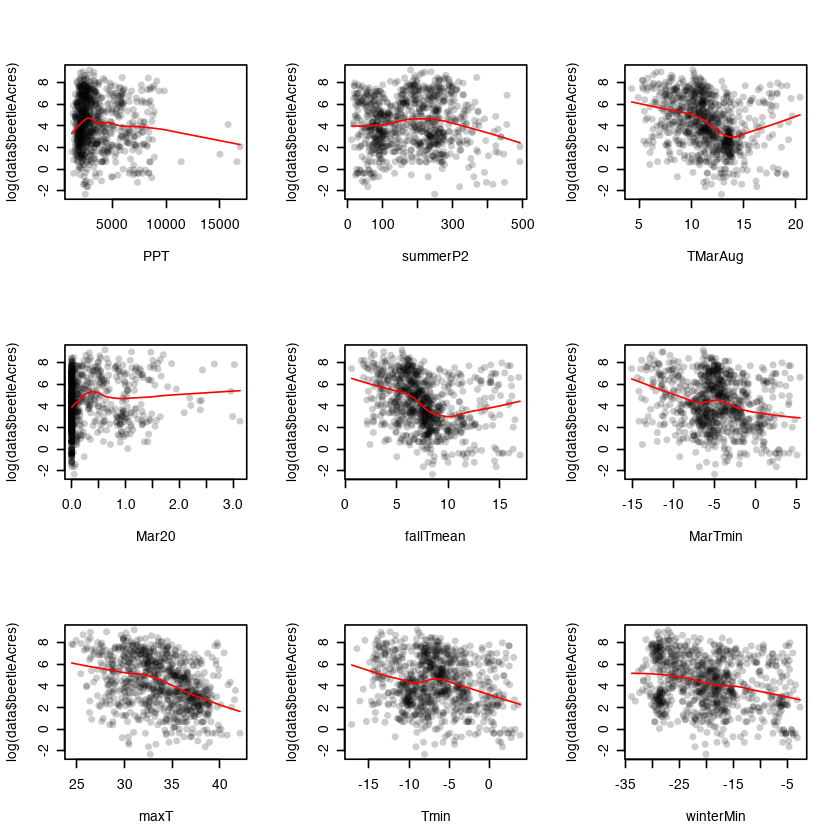

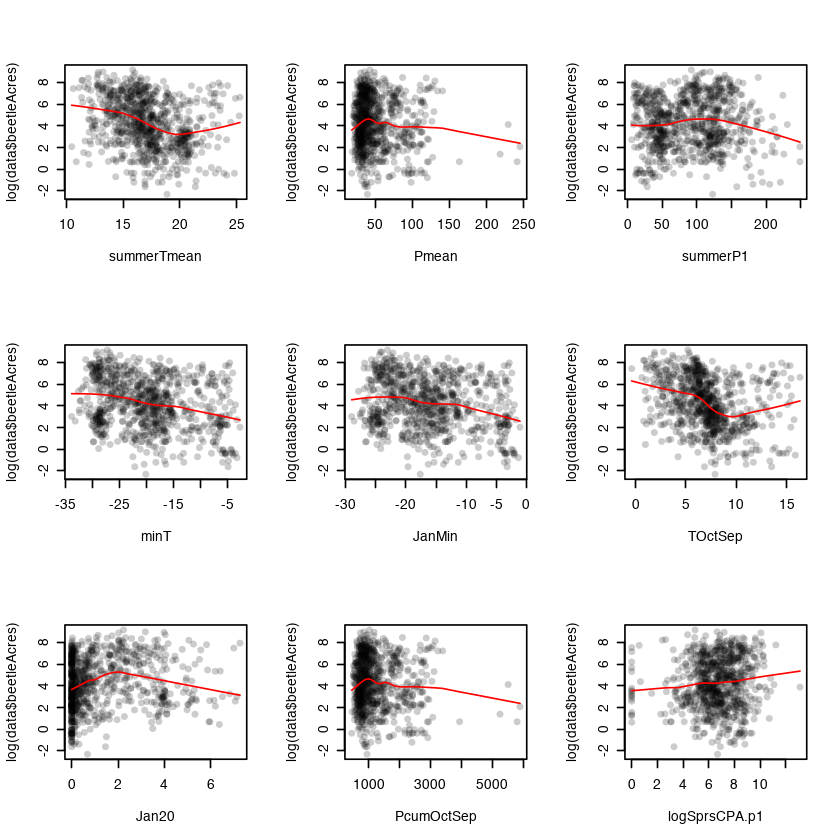

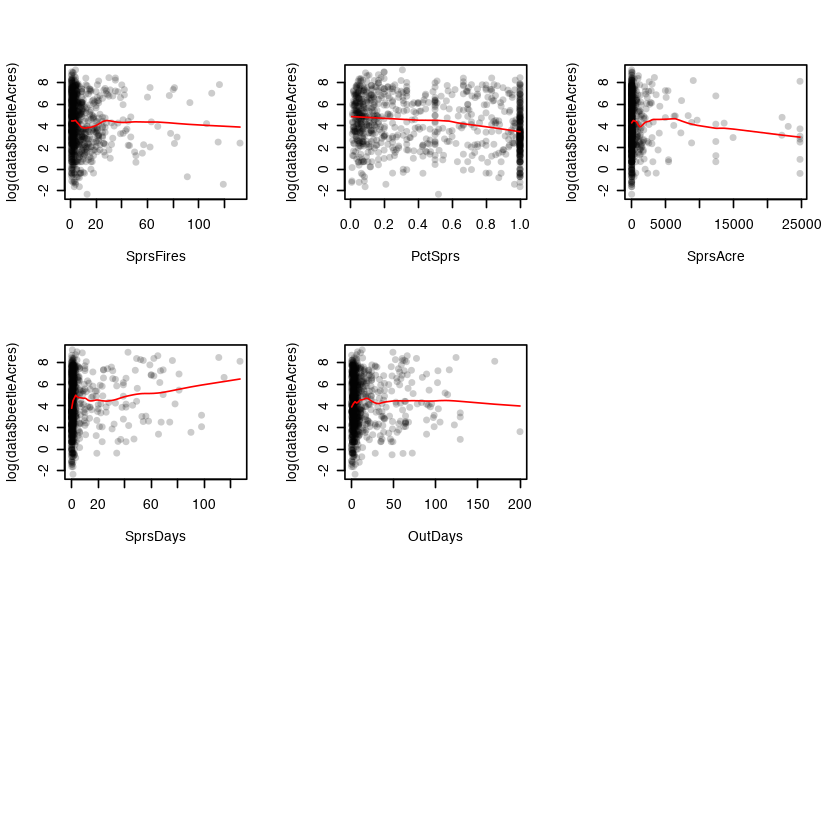

In [52]:
par(mfrow=c(3, 3))
for (field in smoothed) {
  plot(log(data$beetleAcres) ~ data[, field], 
       pch=16, 
       col=rgb(0, 0, 0, 0.2),
       xlab=field)
  lines(lowess(log(data$beetleAcres) ~ data[, field]), col=2)
}

In [21]:
for (field in names(data)) {
  if (field != 'beetleAcres') {
    cat(sprintf('%s + ', field))
  }
}

lon + lat + etopo1 + host + forest + mStdAge + density + PctLarge + PctOld + vcc + mfri + prs + pms + pls + GAP1 + GAP2 + GAP3 + vpd + cwd + maxAugT + summerP0 + Tmean + mi + Tvar + wd + AugTmean + OctTmin + AugMaxT + AugTmax + Acs + MarMin + ddAugJun + ddAugJul + JanTmin + PPT + summerP2 + TMarAug + Mar20 + fallTmean + MarTmin + maxT + Tmin + winterMin + summerTmean + Pmean + summerP1 + minT + JanMin + TOctSep + Jan20 + PcumOctSep + logSprsCPA.p1 + SprsFires + PctSprs + SprsAcre + SprsDays + OutDays + 

In [ ]:
bstar = NULL # Rows of bstar will be bootstrap vectors of regression coefficients.
n = dim(data)[1] 
B = 5000
ptm <- proc.time()
for(draw in 1:B){
  # Randomly sample from the rows, with replacement
  Dstar = data[sample(1:n,size=n,replace=T),]
  model <- lm(
    log(beetleAcres) ~ lon + I(lon^2) + lat + I(lat^2) + etopo1 + I(etopo1^2) + mStdAge + I(mStdAge^2) 
    + density + I(density^2) + PctLarge + PctOld + vcc + log(vcc) + mfri + log(mfri) + prs + I(prs^2) 
    + pms + pls + GAP1 + GAP2 + GAP3 + vpd + I(vpd^2) + cwd + I(cwd^2) + maxAugT + I(maxAugT^2)
    + I(summerP0^2) + summerP0 + Tmean + I(Tmean^2) + exp(Tmean) + mi + I(mi^2) + Tvar + I(Tvar^2) 
    + wd + I(wd^2) + AugTmean + I(AugTmean^2) + OctTmin + I(OctTmin^2) + AugMaxT + I(AugMaxT^2)+ AugTmax 
    + Acs + I(Acs^2) + MarMin + ddAugJun + I(ddAugJun^2) + ddAugJul + I(ddAugJul^2) + JanTmin + PPT + I(PPT^2) 
    + summerP2 + I(summerP2^2) + TMarAug + exp(TMarAug) + Mar20 + log(Mar20 + 1) + fallTmean + exp(fallTmean)
    + MarTmin + maxT + I(maxT^2) + Tmin + winterMin + summerTmean + Pmean + I(Pmean^2) + summerP1 + I(summerP1^2)
    + minT + JanMin + I(JanMin^2) + TOctSep + exp(TOctSep) + Jan20 + I(Jan20^2) + PcumOctSep + I(PcumOctSep^2) 
    + logSprsCPA.p1 + SprsFires + PctSprs + SprsAcre + SprsDays + OutDays,
    data=Dstar)
  bstar = rbind( bstar,coef(model) )
  # print(draw)
} # Next draw
proc.time() - ptm

In [65]:
bstar <- as.data.frame(bstar)

In [66]:
head(bstar)

(Intercept) lon         I(lon^2)      lat      I(lat^2)    etopo1       
1   81.13009   3.70997971  0.0183351995 3.952486 -0.05010302 -0.0005258323
2 -128.55703  -0.86185936 -0.0032904875 3.806850 -0.04786719 -0.0022355834
3   50.30674   2.15216207  0.0100946258 1.027036 -0.01425084  0.0014715013
4 -109.70045  -0.07757397 -0.0001652005 3.887076 -0.04547203  0.0001845599
5   72.67219   2.04753960  0.0091324045 1.659877 -0.02417979 -0.0019609886
6 -141.63331  -0.55317967 -0.0018294013 3.285506 -0.03917070  0.0020408812
  I(etopo1^2)  mStdAge     I(mStdAge^2)  density      ⋯ Jan20       I(Jan20^2)
1 5.371600e-07 0.001585285 -2.118899e-06 5.168716e-05 ⋯ -0.36164568 0.03618688
2 8.876337e-07 0.004818097 -1.314131e-05 5.264946e-05 ⋯ -0.04817379 0.02949048
3 6.774874e-08 0.005329676 -6.473561e-06 5.372437e-05 ⋯ -1.37268986 0.16520544
4 4.302112e-07 0.002415439  6.087534e-06 5.430599e-05 ⋯ -0.01262846 0.04382351
5 7.939570e-07 0.001111286 -6.641206e-06 6.623424e-05 ⋯ -0.58669846 0.15841238
6 8.420754e-08 0.003632842 -1.445063e-05 6.453412e-05 ⋯  0.39897861 0.03101999
  PcumOctSep  I(PcumOctSep^2) logSprsCPA.p1 SprsFires  PctSprs    SprsAcre     
1 -0.20327659  4.645836e-05    0.033854745  0.03370304 -0.6354463 -4.707010e-05
2 -0.01074757 -9.476446e-06    0.053015778  0.02560593 -0.7940962 -3.999188e-05
3 -0.02295999 -8.175037e-06   -0.007379349  0.02034873 -0.8666550 -5.718713e-05
4 -0.01683789  4.634647e-06    0.079469042  0.02306115 -0.8593681 -8.792739e-05
5  0.03938150 -2.245565e-05   -0.047389088  0.02282615 -0.7482369 -5.892777e-05
6 -0.10255340  2.528601e-05   -0.015770780  0.02088433 -0.7735046 -1.764985e-05
  SprsDays      OutDays      
1  0.0108081087 -0.0026821350
2  0.0053133512 -0.0003260779
3 -0.0034150566  0.0039027233
4  0.0010858201  0.0041413484
5  0.0003927101 -0.0010267591
6 -0.0062015666  0.0084619891

In [67]:
names(bstar)

[1] "(Intercept)"     "lon"             "I(lon^2)"        "lat"            
 [5] "I(lat^2)"        "etopo1"          "I(etopo1^2)"     "mStdAge"        
 [9] "I(mStdAge^2)"    "density"         "I(density^2)"    "PctLarge"       
[13] "PctOld"          "vcc"             "log(vcc)"        "mfri"           
[17] "log(mfri)"       "prs"             "I(prs^2)"        "pms"            
[21] "pls"             "GAP1"            "GAP2"            "GAP3"           
[25] "vpd"             "I(vpd^2)"        "cwd"             "I(cwd^2)"       
[29] "maxAugT"         "I(maxAugT^2)"    "I(summerP0^2)"   "summerP0"       
[33] "Tmean"           "I(Tmean^2)"      "exp(Tmean)"      "mi"             
[37] "I(mi^2)"         "Tvar"            "I(Tvar^2)"       "wd"             
[41] "I(wd^2)"         "AugTmean"        "I(AugTmean^2)"   "OctTmin"        
[45] "I(OctTmin^2)"    "AugMaxT"         "I(AugMaxT^2)"    "AugTmax"        
[49] "Acs"             "I(Acs^2)"        "MarMin"          "ddAugJun"       
[53] "I(ddAugJun^2)"   "ddAugJul"        "I(ddAugJul^2)"   "JanTmin"        
[57] "PPT"             "I(PPT^2)"        "summerP2"        "I(summerP2^2)"  
[61] "TMarAug"         "exp(TMarAug)"    "Mar20"           "log(Mar20 + 1)" 
[65] "fallTmean"       "exp(fallTmean)"  "MarTmin"         "maxT"           
[69] "I(maxT^2)"       "Tmin"            "winterMin"       "summerTmean"    
[73] "Pmean"           "I(Pmean^2)"      "summerP1"        "I(summerP1^2)"  
[77] "minT"            "JanMin"          "I(JanMin^2)"     "TOctSep"        
[81] "exp(TOctSep)"    "Jan20"           "I(Jan20^2)"      "PcumOctSep"     
[85] "I(PcumOctSep^2)" "logSprsCPA.p1"   "SprsFires"       "PctSprs"        
[89] "SprsAcre"        "SprsDays"        "OutDays"

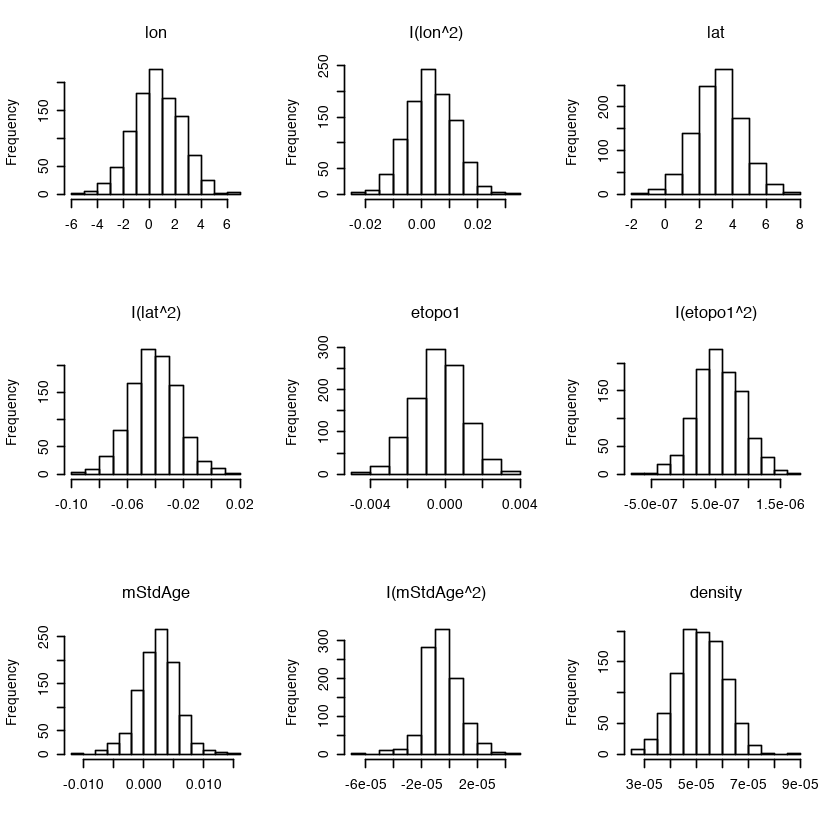

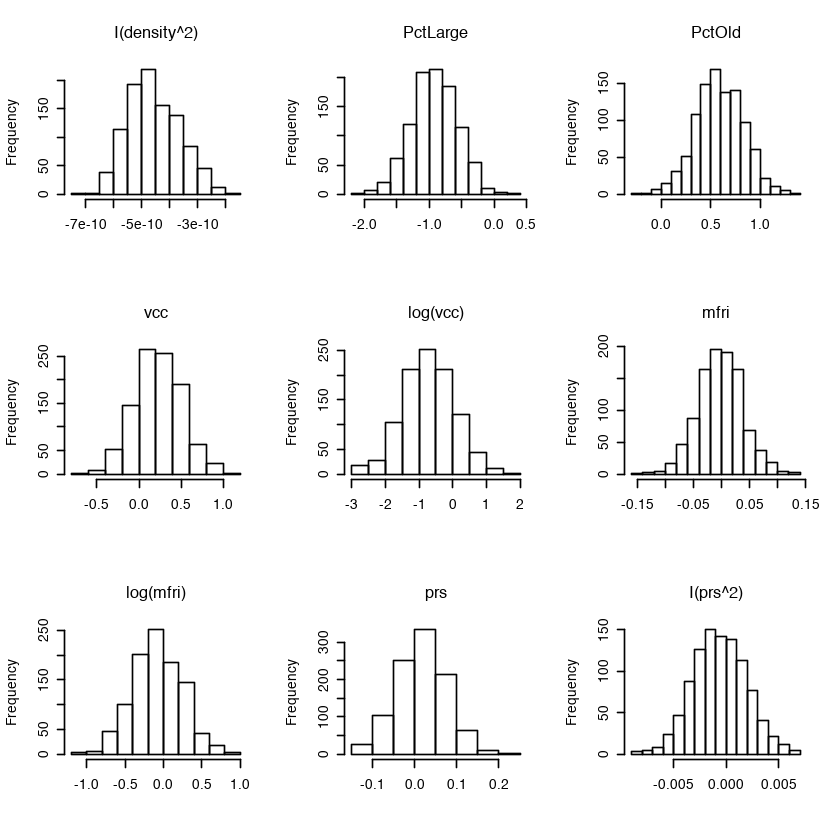

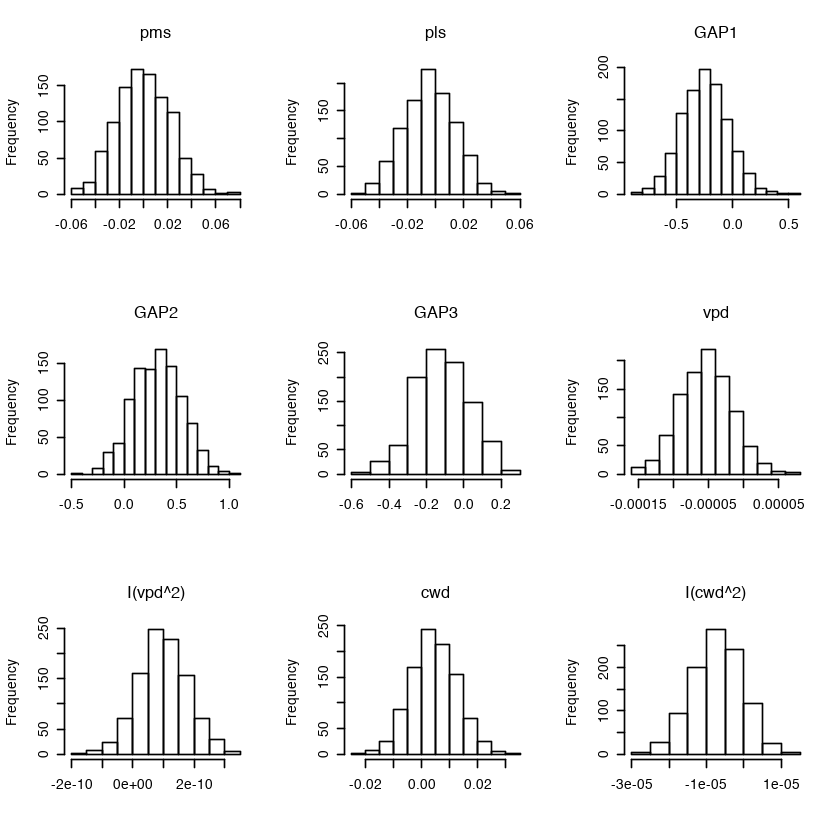

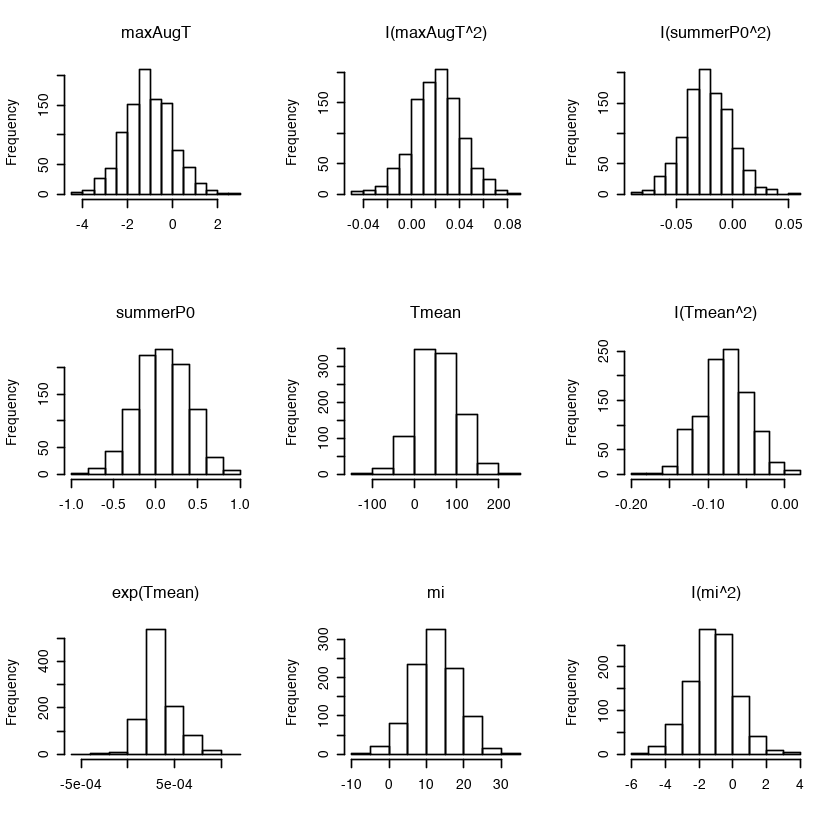

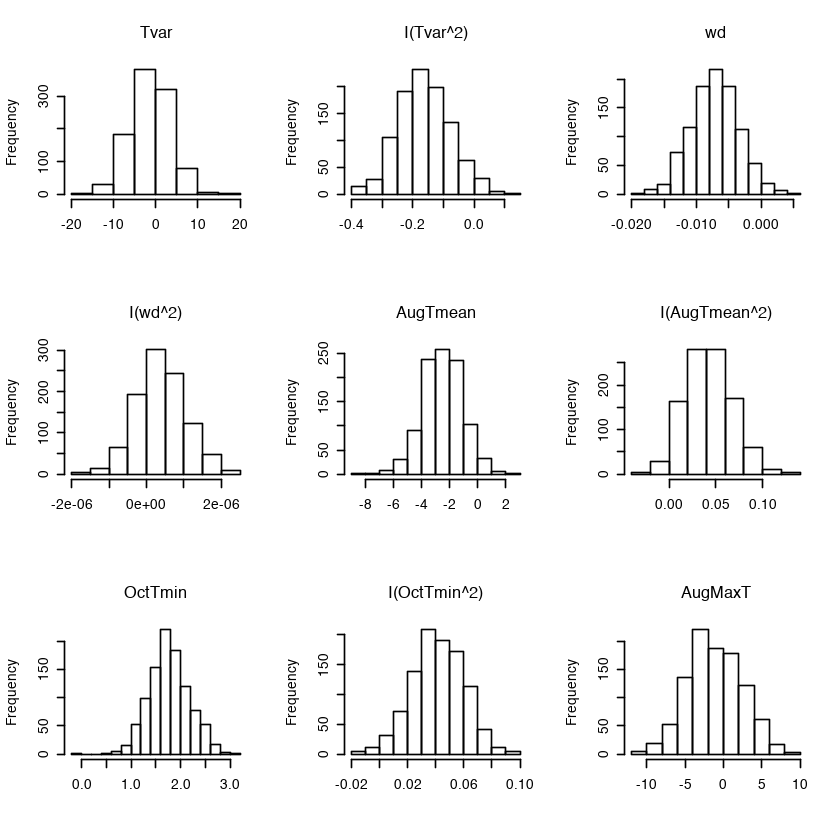

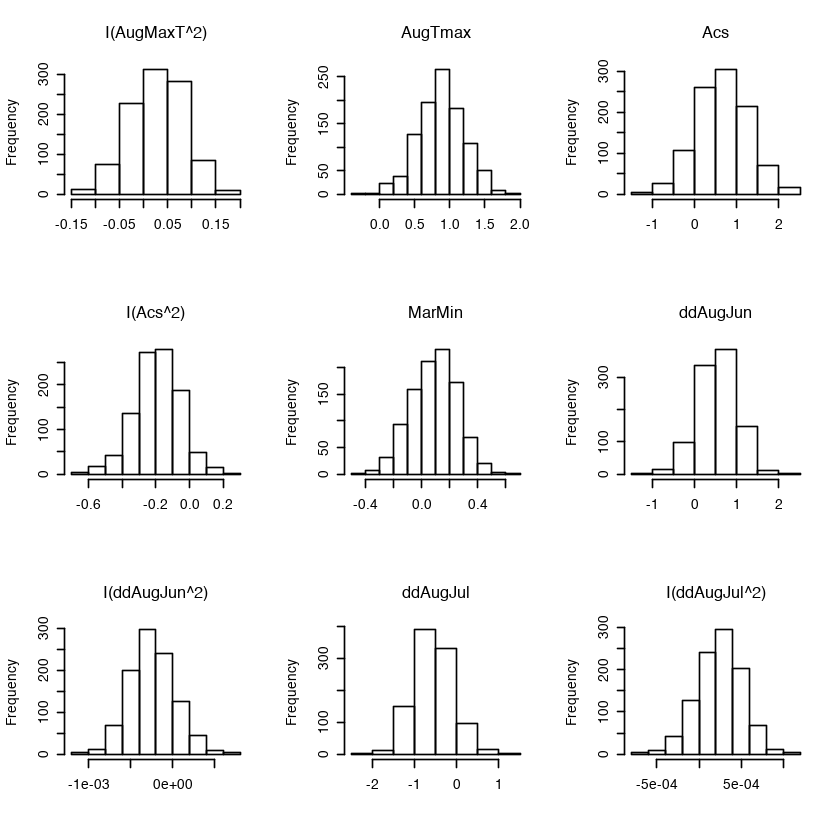

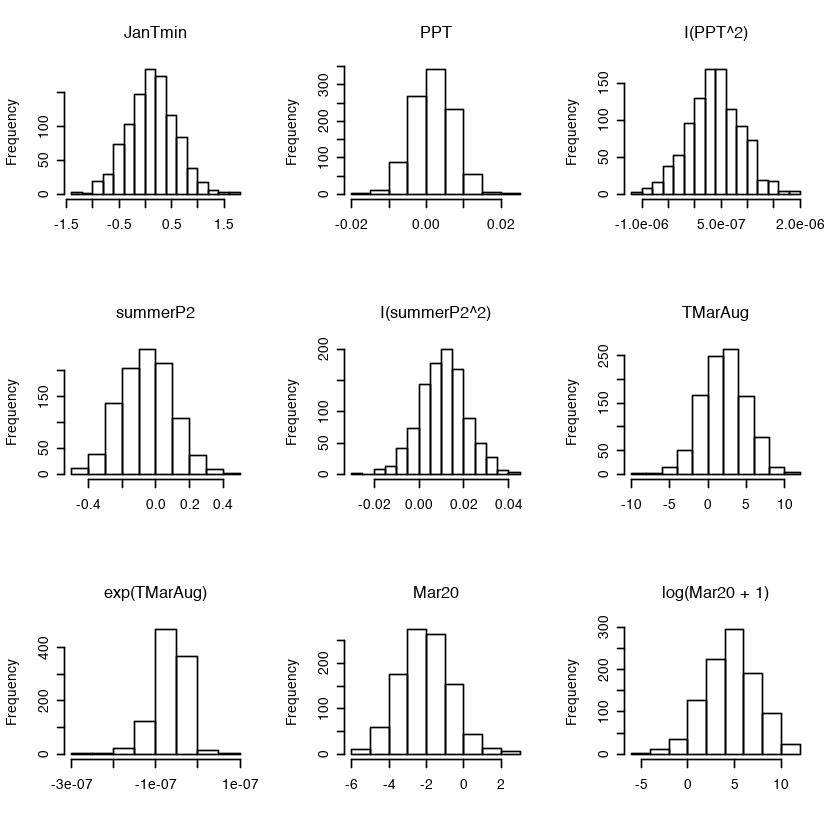

ERROR: Error in hist.default(bstar[, field], main = field, xlab = ""): invalid number of 'breaks'


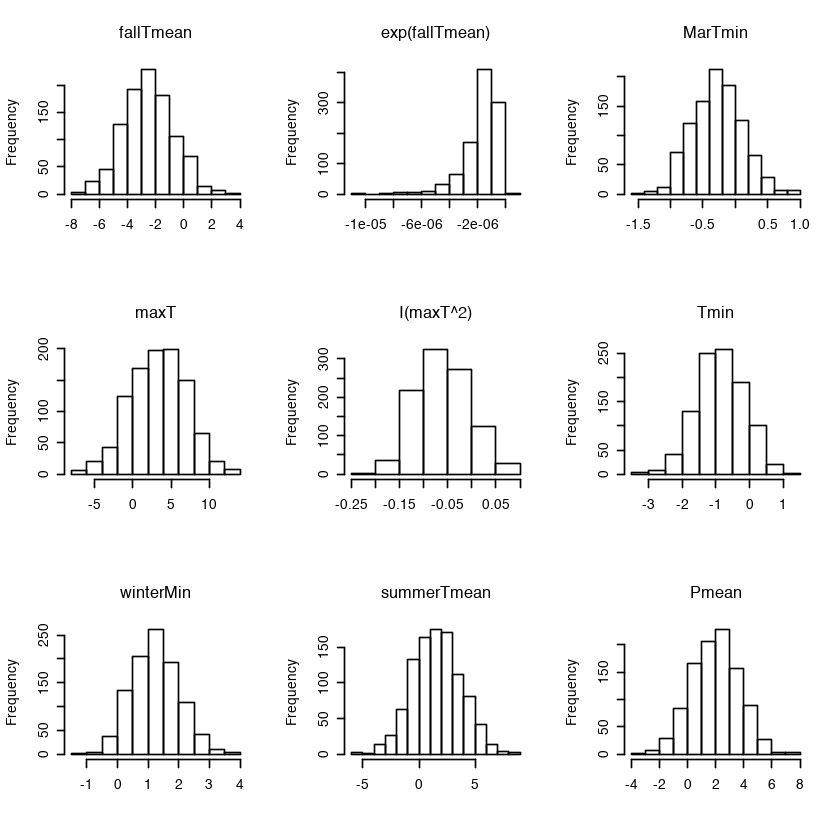

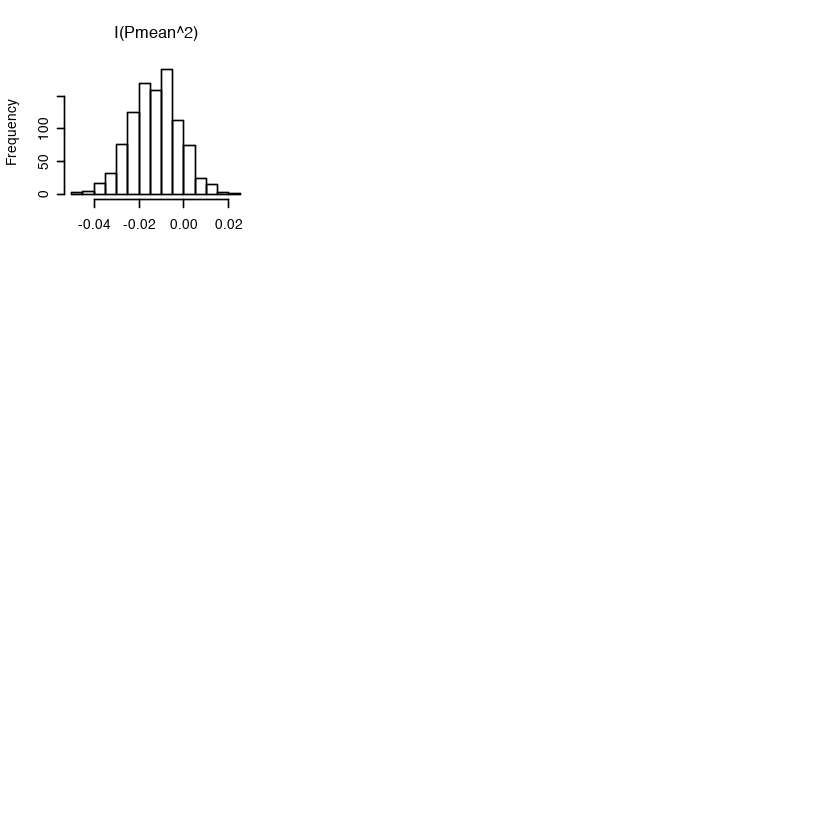

In [73]:
par(mfrow=c(3, 3))
for (field in names(bstar)) {
    if(field != '(Intercept)'){
        hist(bstar[,field], main=field, xlab='')
    }
}

In [53]:
mod <- lm(
  log(beetleAcres) ~ lon + I(lon^2) + lat + I(lat^2) + etopo1 + I(etopo1^2) + mStdAge + I(mStdAge^2) 
    + density + I(density^2) + PctLarge + PctOld + vcc + log(vcc) + mfri + log(mfri) + prs + I(prs^2) 
    + pms + pls + GAP1 + GAP2 + GAP3 + vpd + I(vpd^2) + cwd + I(cwd^2) + maxAugT + I(maxAugT^2)
    + I(summerP0^2) + summerP0 + Tmean + I(Tmean^2) + exp(Tmean) + mi + I(mi^2) + Tvar + I(Tvar^2) 
    + wd + I(wd^2) + AugTmean + I(AugTmean^2) + OctTmin + I(OctTmin^2) + AugMaxT + I(AugMaxT^2)+ AugTmax 
    + Acs + I(Acs^2) + MarMin + ddAugJun + I(ddAugJun^2) + ddAugJul + I(ddAugJul^2) + JanTmin + PPT + I(PPT^2) 
    + summerP2 + I(summerP2^2) + TMarAug + exp(TMarAug) + Mar20 + log(Mar20 + 1) + fallTmean + exp(fallTmean)
    + MarTmin + maxT + I(maxT^2) + Tmin + winterMin + summerTmean + Pmean + I(Pmean^2) + summerP1 + I(summerP1^2)
    + minT + JanMin + I(JanMin^2) + TOctSep + exp(TOctSep) + Jan20 + I(Jan20^2) + PcumOctSep + I(PcumOctSep^2) 
    + logSprsCPA.p1 + SprsFires + PctSprs + SprsAcre + SprsDays + OutDays, 
    data=data)

In [54]:
mod.r <- step(mod, trace=0)

In [55]:
summary(mod.r)


Call:
lm(formula = log(beetleAcres) ~ I(lon^2) + lat + I(lat^2) + I(etopo1^2) + 
    density + I(density^2) + PctLarge + PctOld + GAP1 + GAP2 + 
    vpd + I(vpd^2) + I(cwd^2) + I(summerP0^2) + Tmean + I(Tmean^2) + 
    exp(Tmean) + mi + I(mi^2) + I(Tvar^2) + wd + AugTmean + I(AugTmean^2) + 
    OctTmin + I(OctTmin^2) + I(AugMaxT^2) + AugTmax + ddAugJun + 
    ddAugJul + I(ddAugJul^2) + PPT + summerP2 + I(summerP2^2) + 
    exp(TMarAug) + Mar20 + log(Mar20 + 1) + fallTmean + exp(fallTmean) + 
    maxT + I(maxT^2) + Tmin + winterMin + summerTmean + Pmean + 
    I(Pmean^2) + I(summerP1^2) + minT + I(JanMin^2) + TOctSep + 
    exp(TOctSep) + PcumOctSep + I(PcumOctSep^2) + SprsFires + 
    PctSprs + SprsAcre, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.2798 -0.9505  0.0894  0.9762  6.9661 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -1.153e+02  1.963e+01  -5.876 6.26e-09 ***
I(lon^2)         7.470e-04  3.290e-04   2.271

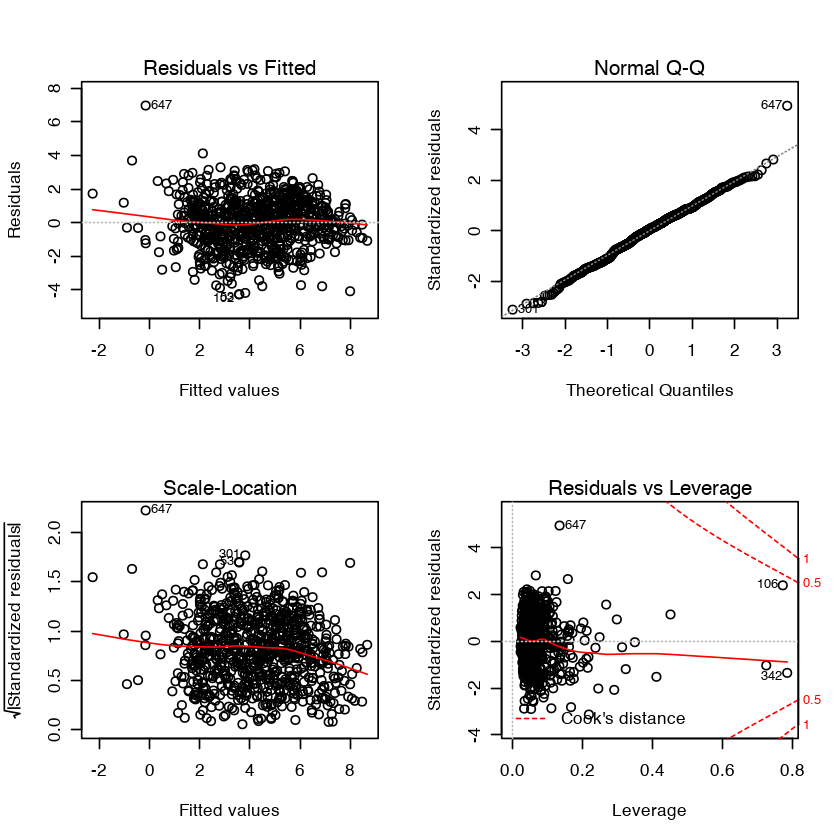

In [56]:
par(mfrow=c(2, 2))
plot(mod.r)

In [57]:
data$preds <- mod.r$fitted

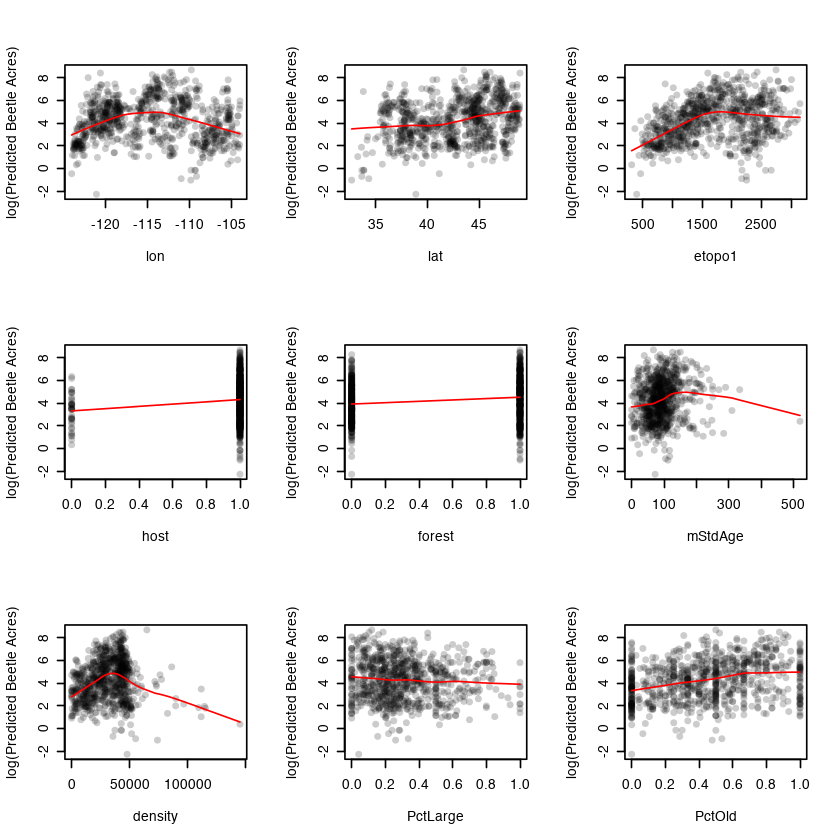

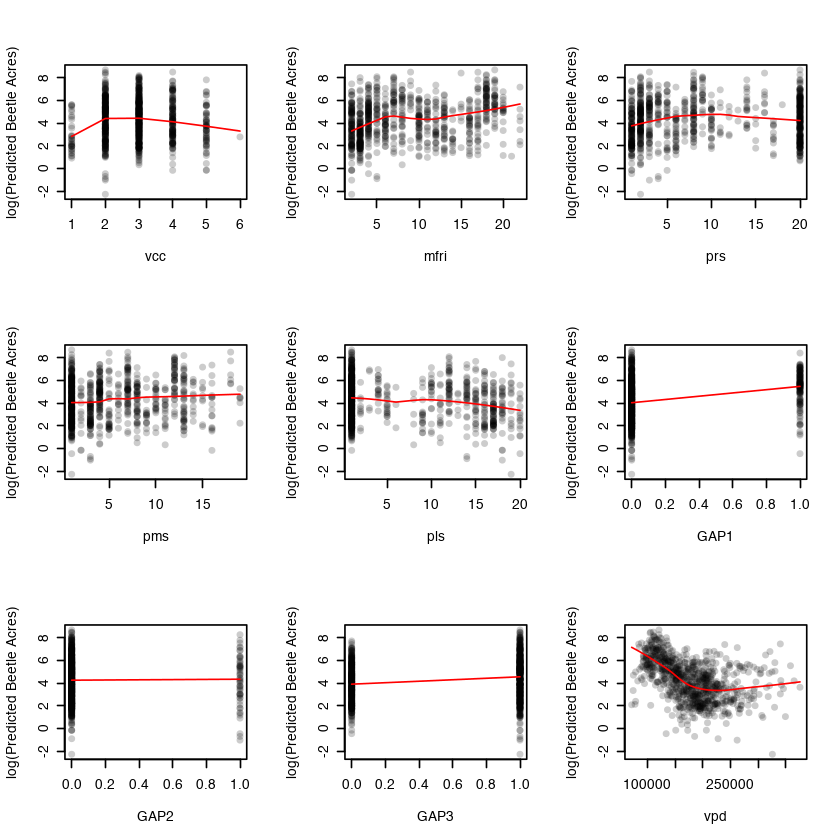

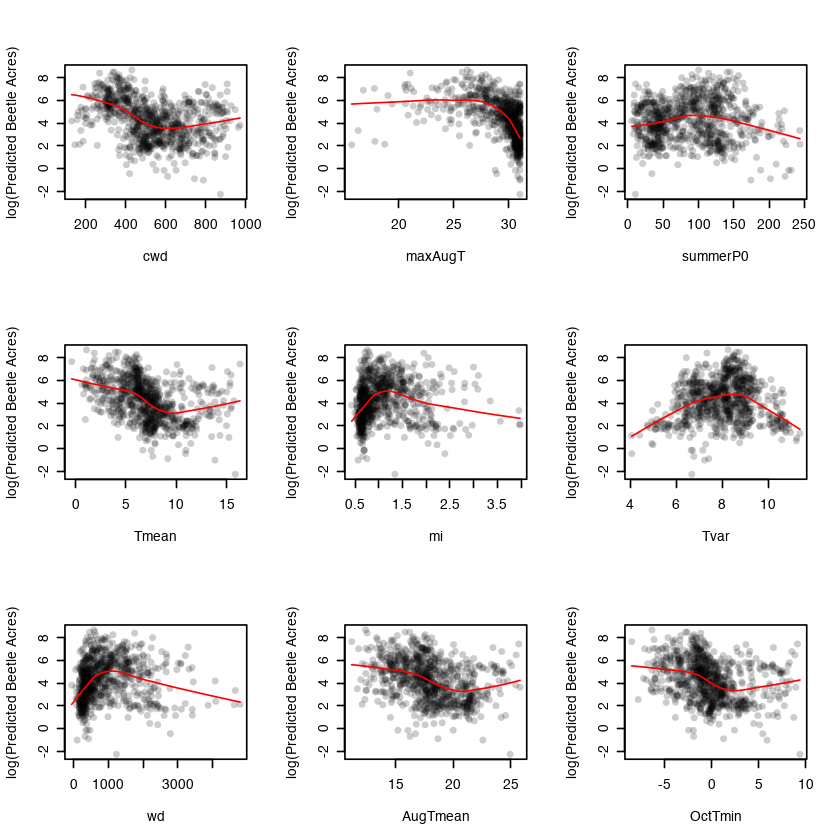

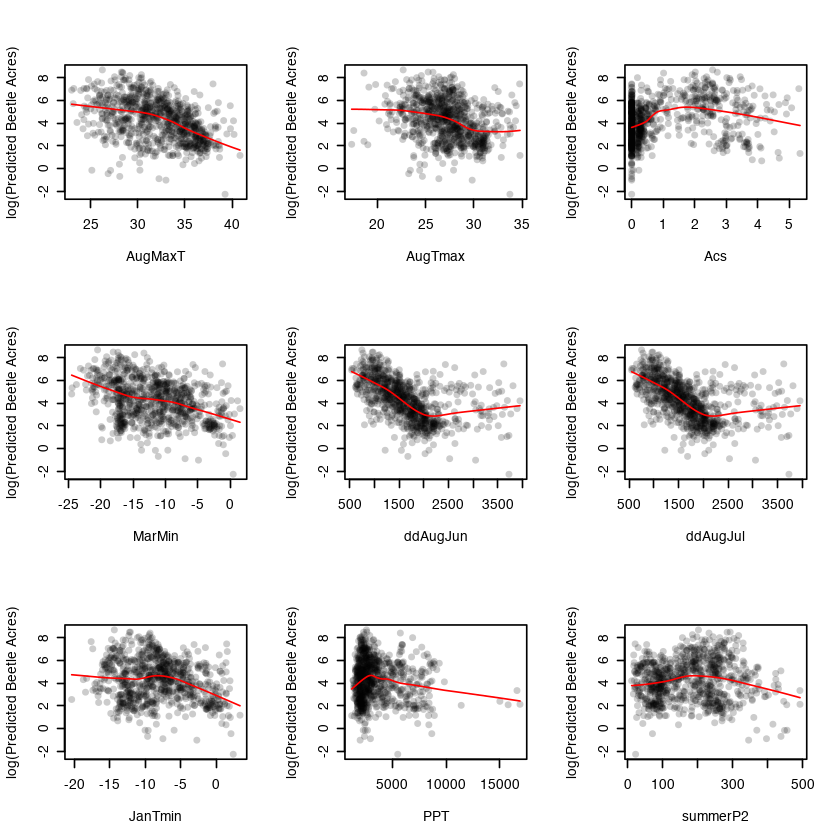

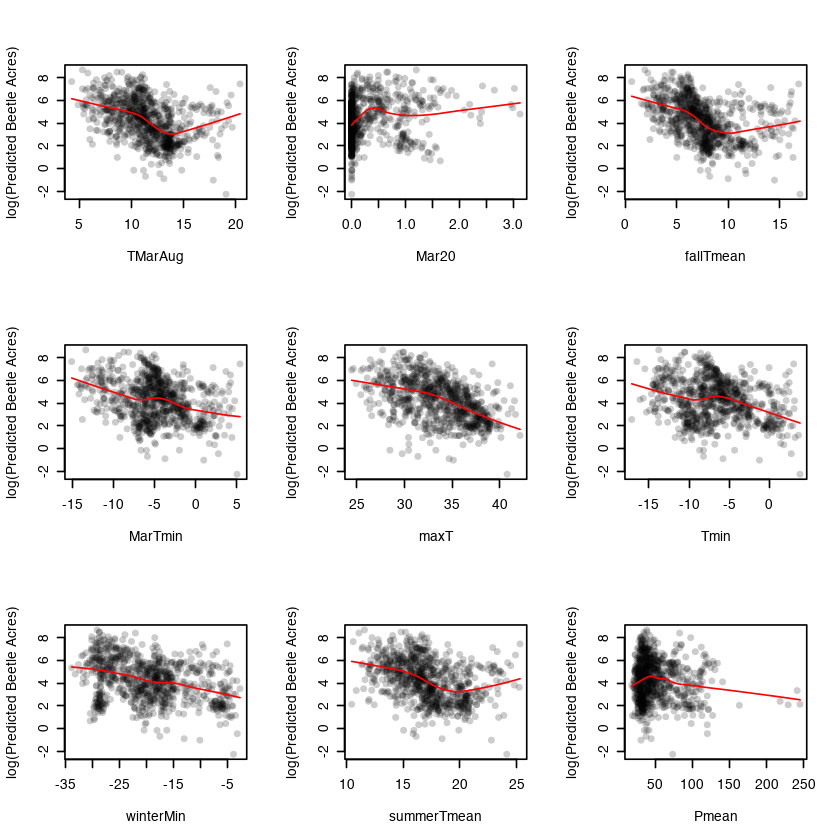

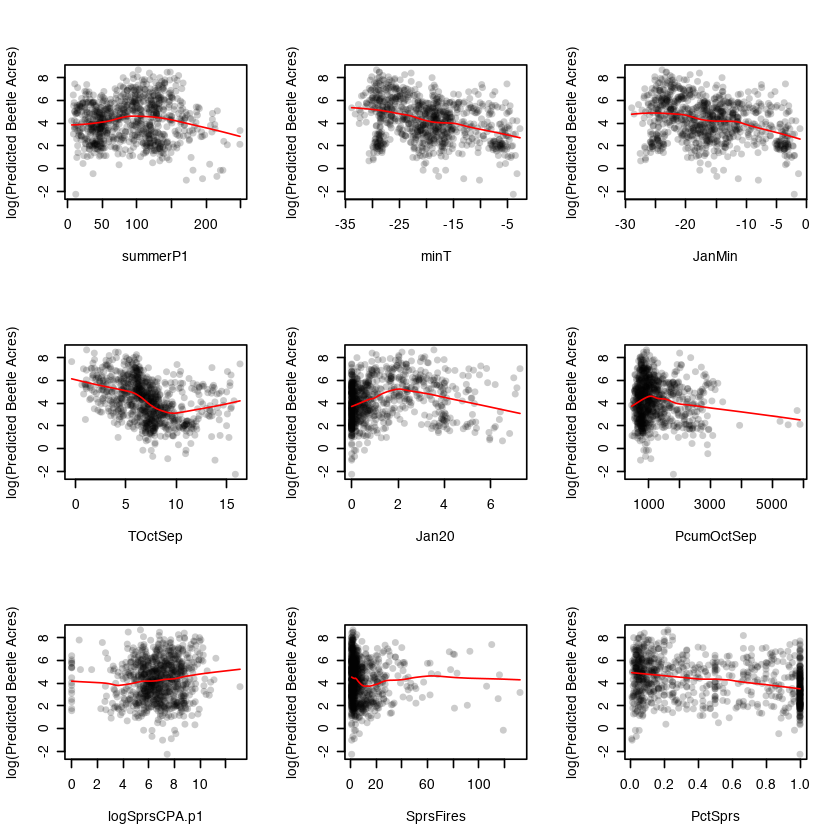

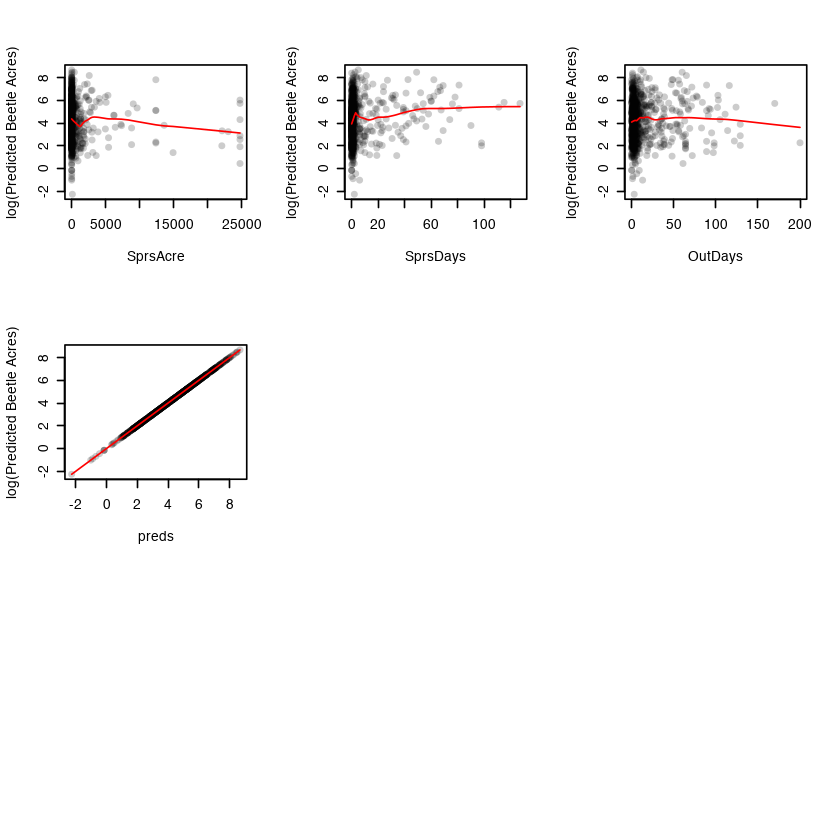

In [58]:
par(mfrow=c(3, 3))
for (field in names(data)) {
  if (field != 'beetleAcres') {
    plot(data$preds ~ data[, field], 
         pch=16, 
         col=rgb(0, 0, 0, 0.2), 
         xlab=field,
         ylab='log(Predicted Beetle Acres)')
    lines(lowess(data$preds ~ data[, field]), col=2)
  }
}

In [59]:
med.df <- data.frame(t(apply(data, 2, median)))
n.steps <- 100
med.df <- med.df[rep(1, n.steps), ]

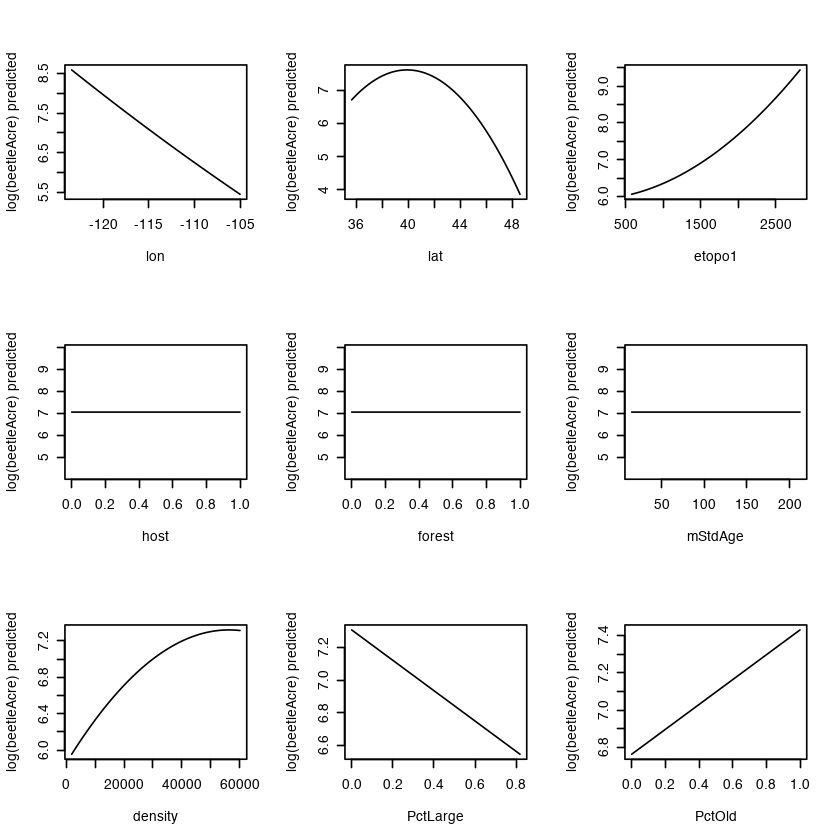

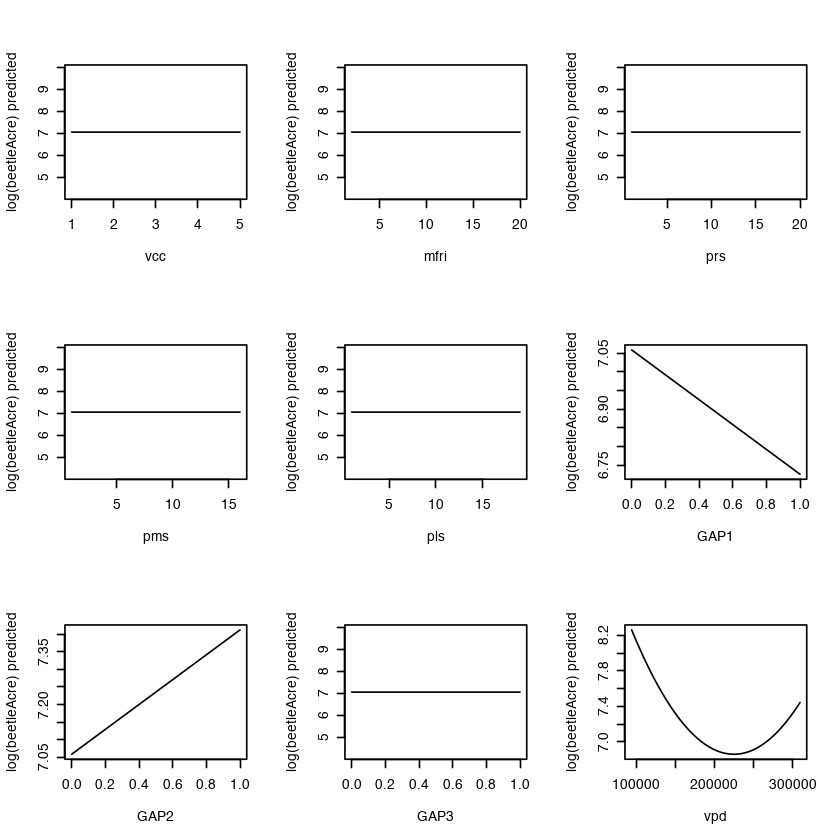

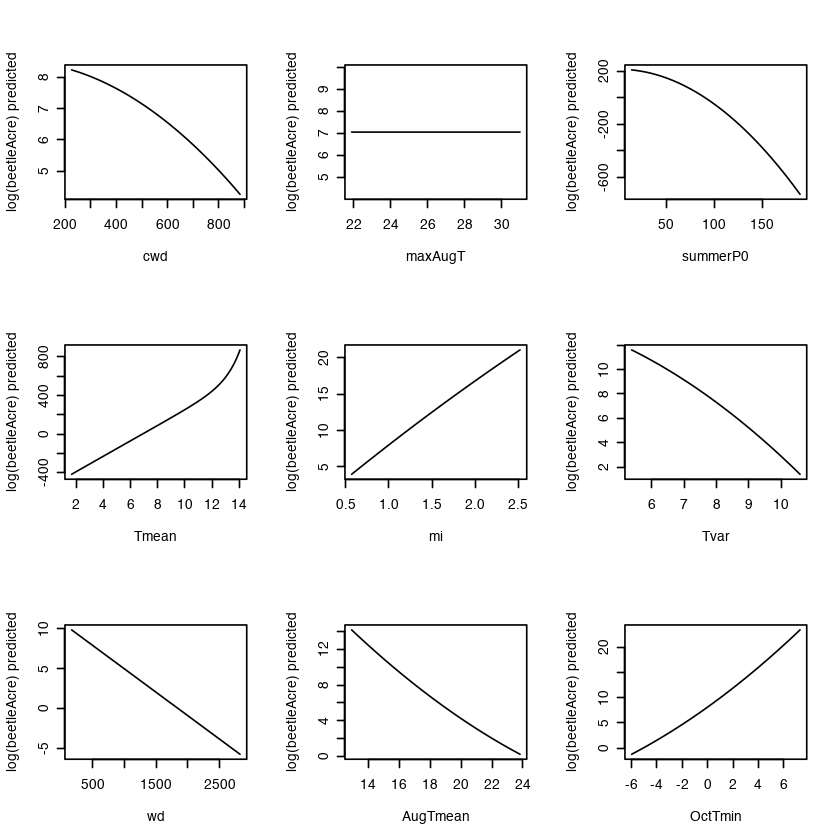

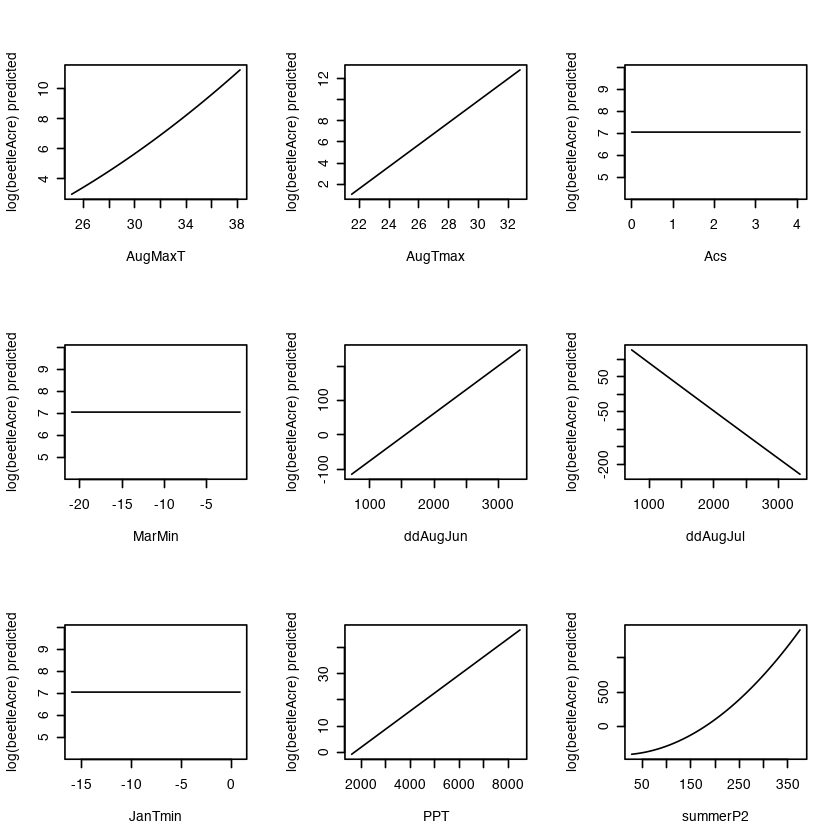

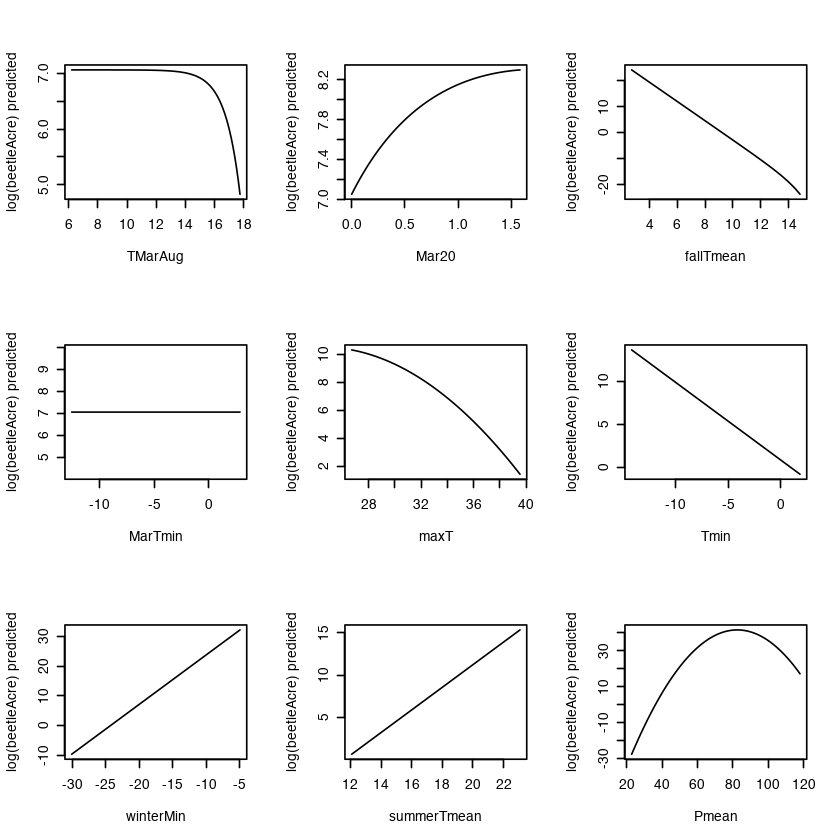

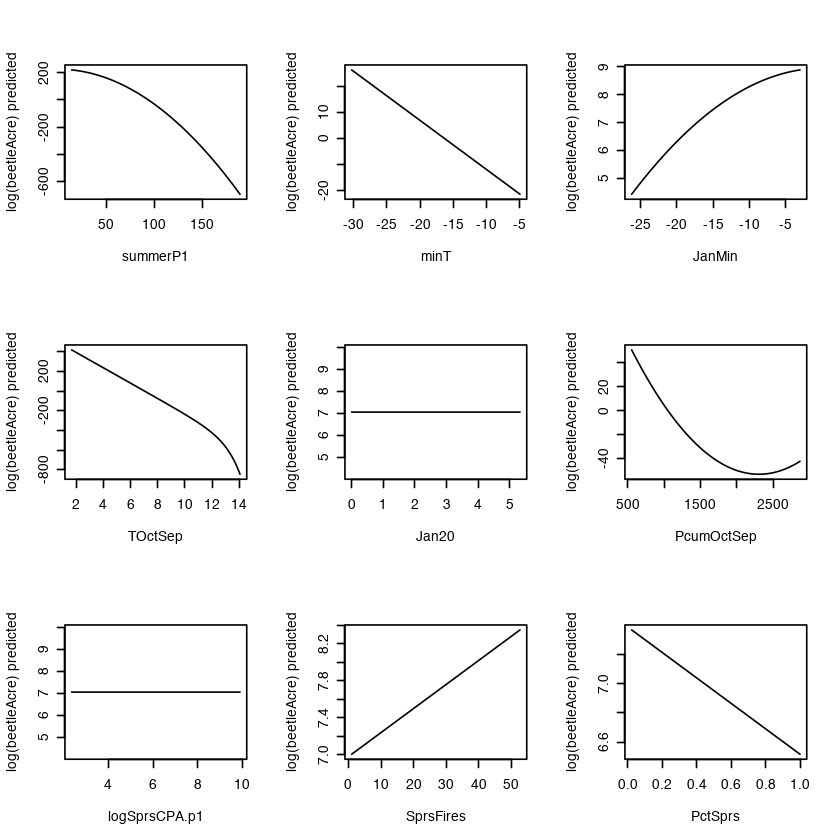

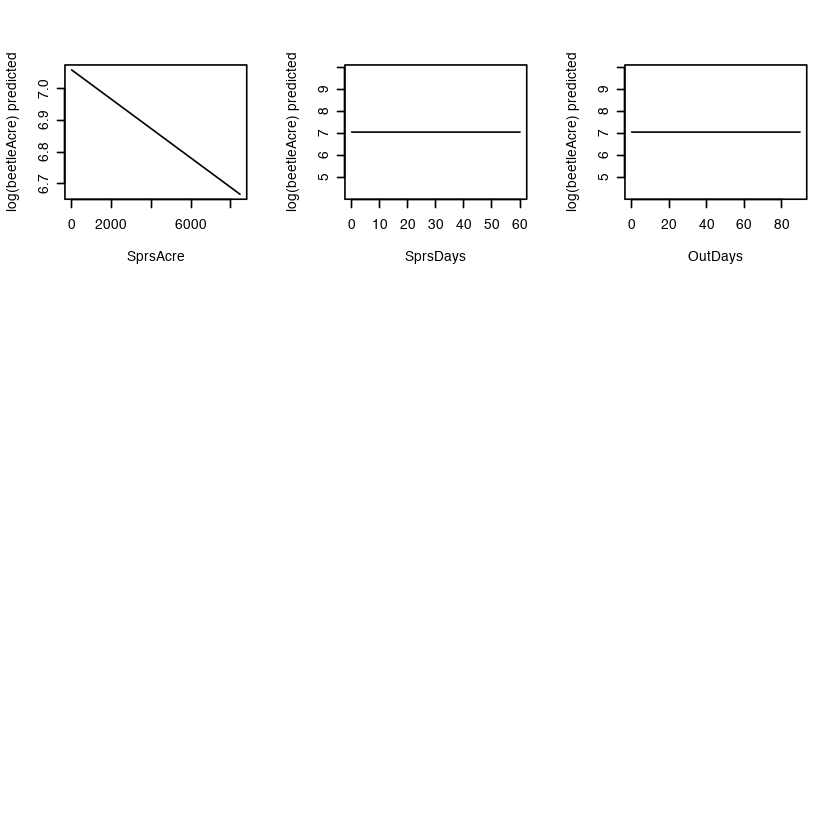

In [61]:
par(mfrow=c(3, 3))
for (field in names(med.df)) {
  if (!(field %in% c('preds', 'beetleAcres'))) {
    test.df <- med.df
    xmin <- quantile(data[, field], probs=0.025)
    xmax <- quantile(data[, field], probs=0.975)
    test.df[, field] <- seq(xmin, xmax, length=100)
    preds <- predict(mod.r, newdata=test.df)
    plot(preds ~ test.df[, field], 
         type='l', 
         xlab=field, 
         ylab='log(beetleAcre) predicted')
  }
}

In [62]:
range(data$beetleAcres) 

[1]    0.1 9363.3

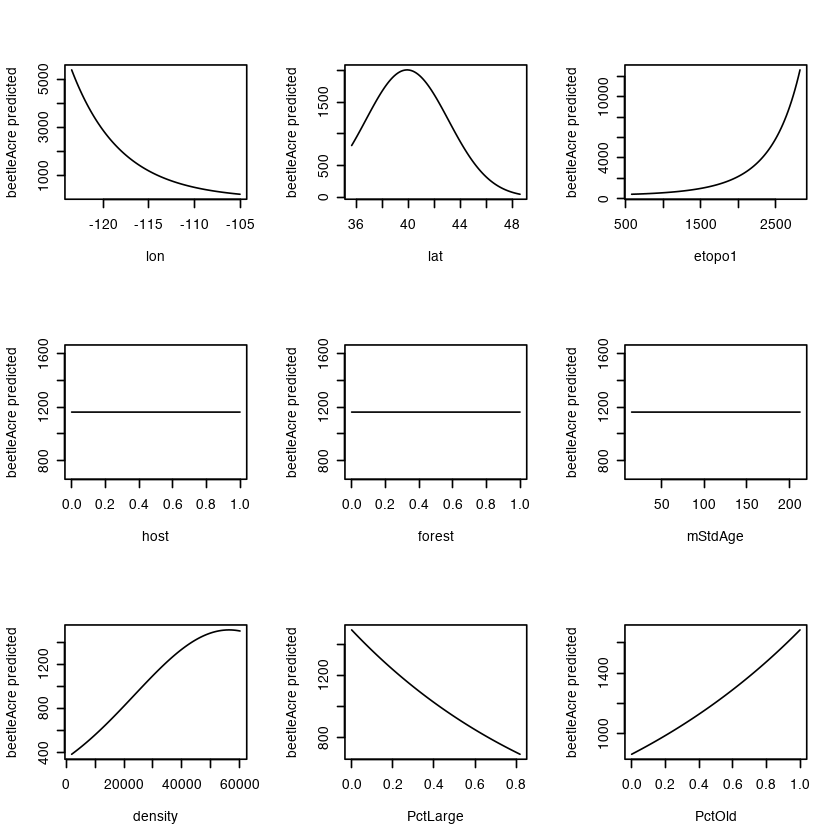

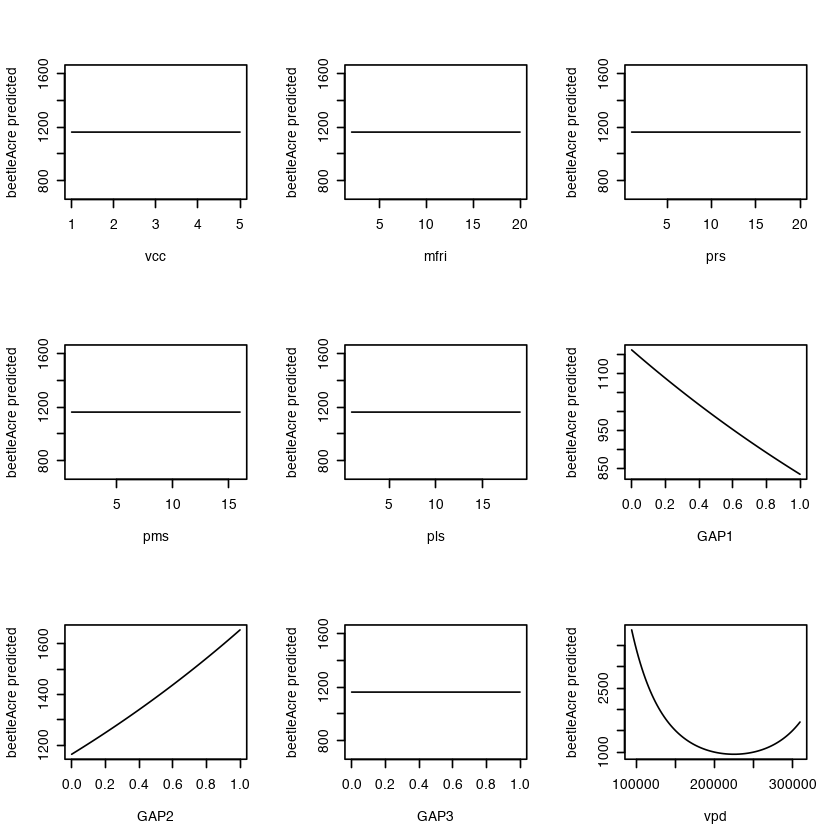

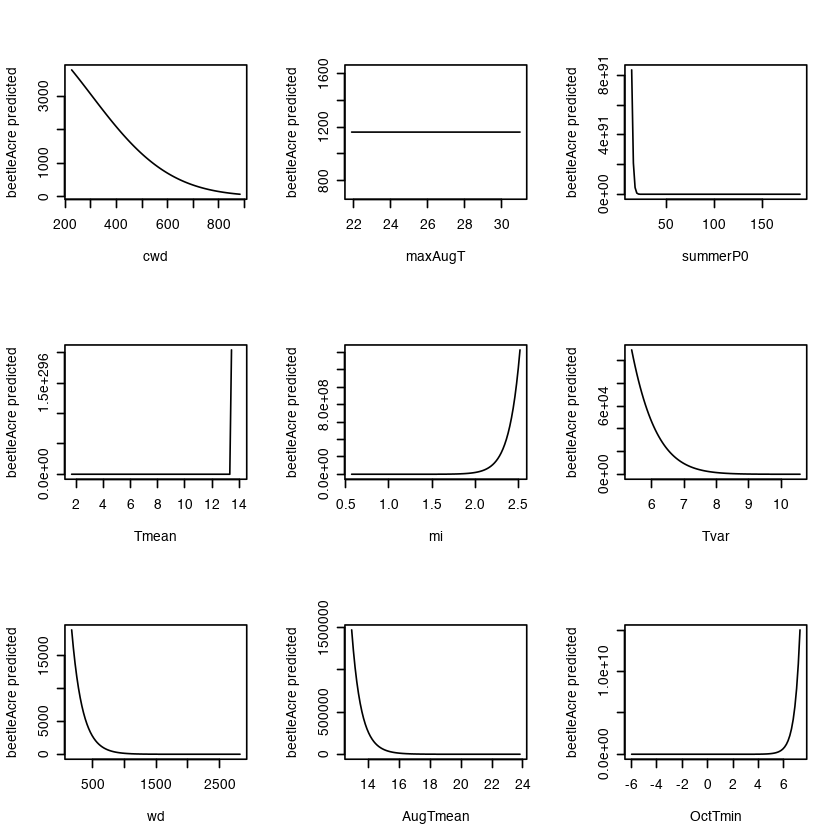

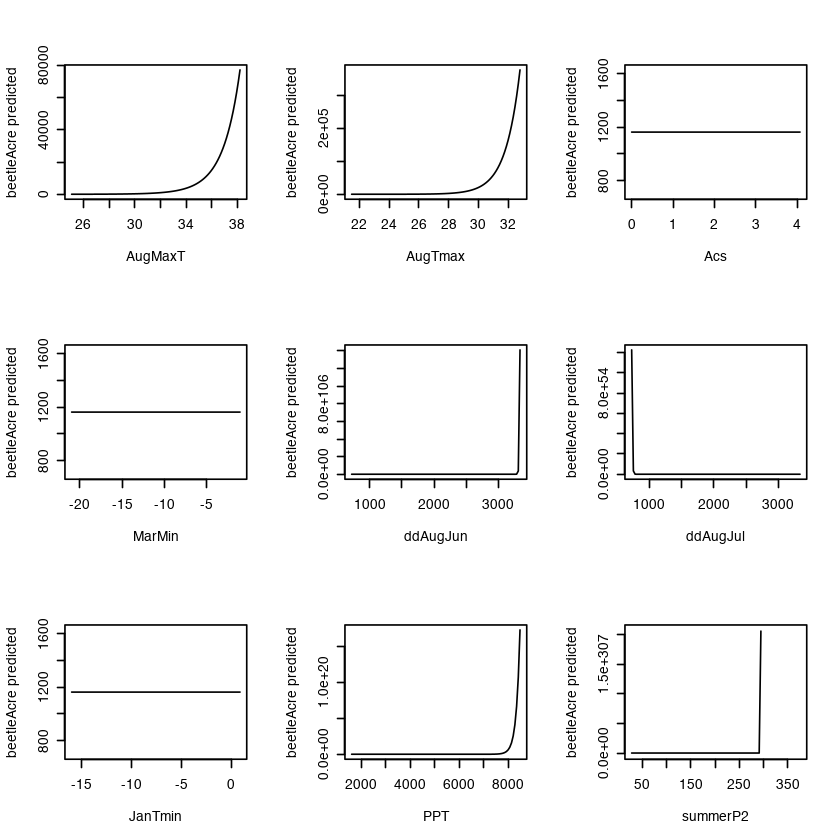

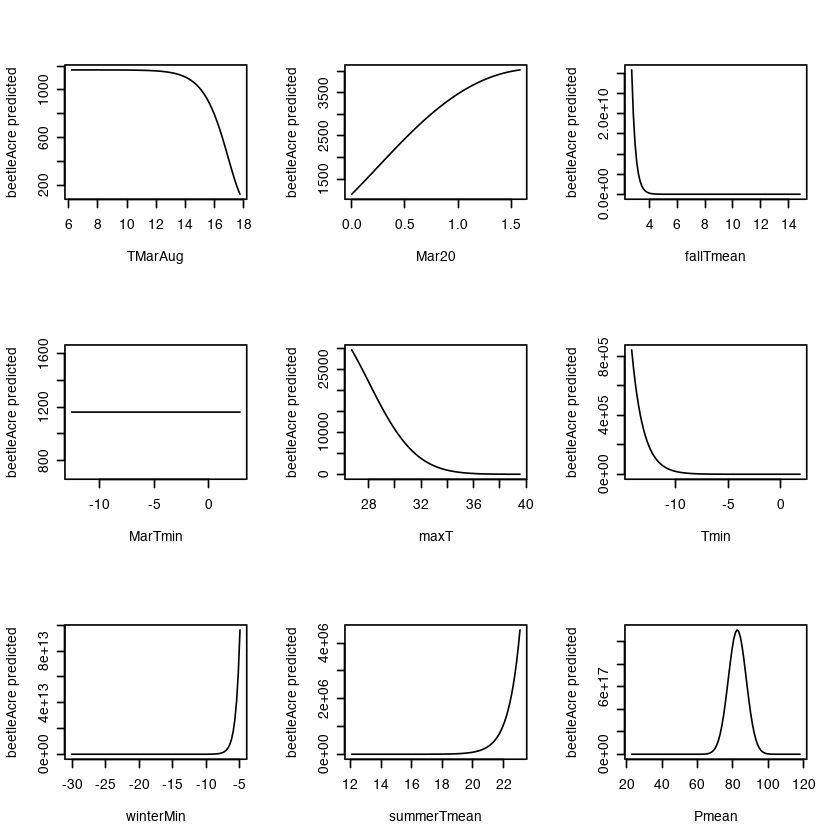

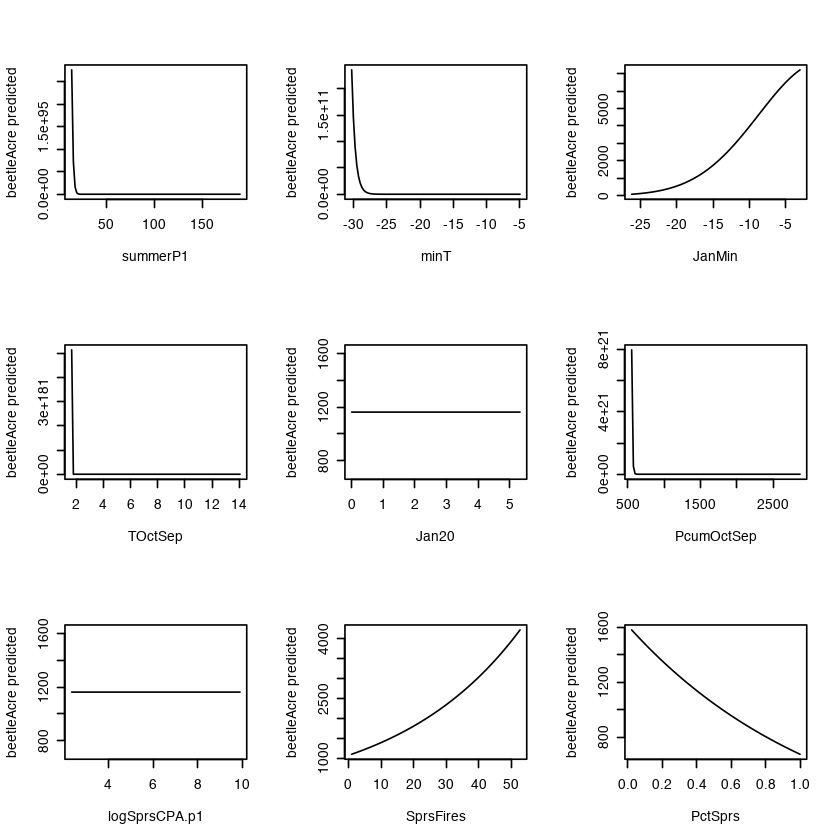

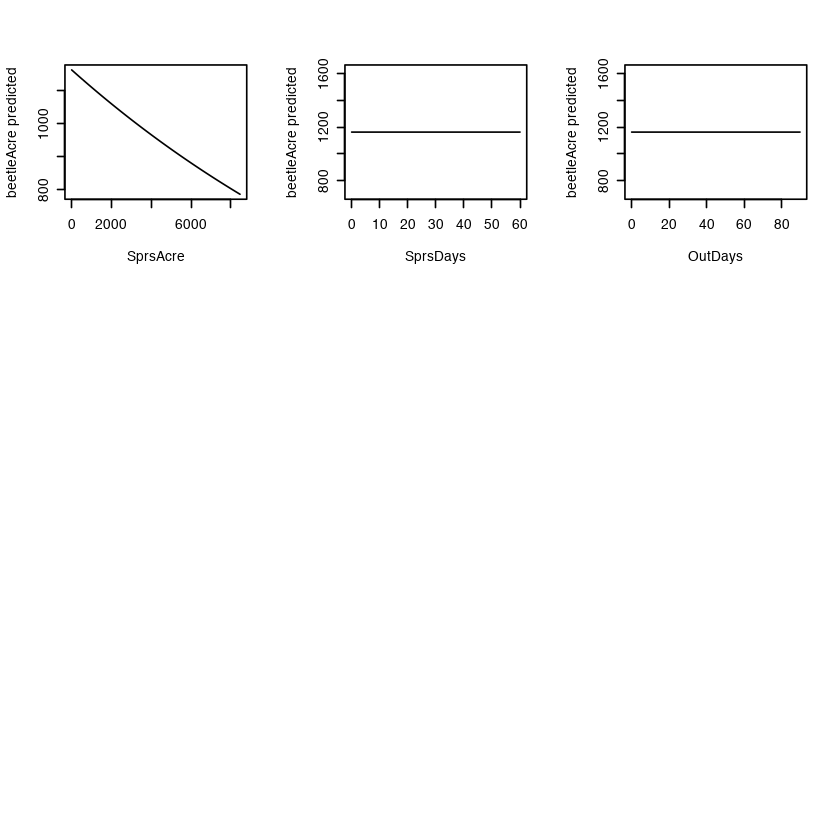

In [63]:
par(mfrow=c(3, 3))
for (field in names(med.df)) {
  if (!(field %in% c('preds', 'beetleAcres'))) {
    test.df <- med.df
    xmin <- quantile(data[, field], probs=0.025)
    xmax <- quantile(data[, field], probs=0.975)
    test.df[, field] <- seq(xmin, xmax, length=100)
    preds <- exp(predict(mod.r, newdata=test.df))
    plot(preds ~ test.df[, field], 
         type='l', 
         xlab=field, 
         ylab='beetleAcre predicted')
  }
}